# Milestone 3 - EDA

# what is my aim with EDA? 
- Explore the dataset, understand what might be driving the machine failures.
- forecast when the machine might fail.

In [3]:
# Imports 
import DataFrameInfo_class as info
import pandas as pd 
import numpy as np
from scipy.stats import normaltest 
from scipy import stats
from statsmodels.graphics.gofplots import qqplot 
import matplotlib.pyplot as plt
import seaborn as sns
import DataFrameInfo_class as info
from IPython.display import display
from scipy.stats import pointbiserialr

In [4]:
# Load data 
# Note that the CSV we are reading is the one after running DT_v4
failure_data = pd.read_csv('failure_data_after_data_transformation.csv')

In [5]:
# Patch, drop 'Unnamed: 0.1', 'Unnamed: 0'
failure_data.columns
failure_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

failure_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,3416,L50595,L,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0,0,1,0
1,7130,L54309,L,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0,0,1,0
2,2320,M17179,M,299.2,308.8,1700,33.5,185.0,0,0,0,0,0,0,0,0,1
3,9601,M24460,M,298.9,310.0,1561,45.3,58.0,0,0,0,0,0,0,0,0,1
4,614,L47793,L,298.1,309.9,1634,30.0,53.0,0,0,0,0,0,0,0,1,0


# Classes

In [6]:
class DataFrameInfo:
    def __init__(self, df):
        self.df = df 
    
    def print_df(self):
        print(self.df)
    
    def print_head(self):
        print(self.df.head())

    def data_type(self):
        print(self.df.dtypes)
    
    def return_info(self):
        return self.df.info()
    
    def describe_statistics(self):
        return self.df.describe().loc[['mean', 'std', '50%']]
    
    def unique_value_count(self, column_names):
        return self.df[column_names].nunique()
    
    def percentage_of_null(self):
        percentage_of_null = self.df.isnull().sum() / len(self.df) * 100  
        return percentage_of_null
    
    def are_all_observations_unique(self, column_name):
        print(f'The {column_name} column contains only unique rows: {len(self.df) == self.df[column_name].nunique()}')
    
    def normal_test(self, column_name):
        stat, p = normaltest(self.df[column_name], nan_policy = 'omit')
        print('Statistics=%.3f, p=%.3f' % (stat, p))

    def print_mean(self, column_name):
        print(f'The mean of {column_name} is {self.df[column_name].mean()}')
    
    def print_median(self, column_name):
        print(f'The median of {column_name} is {self.df[column_name].median()}')

    def column_names(self):
        return self.df.columns

    def continous_variables(self):
        continous_variables = []
        for i in self.df.columns:
            if self.df[i].nunique() > 2:
                continous_variables.append(i)
        return continous_variables
    
    def z_score_info(self, z_scores):
        # Z-score Threshold 
        threshold_2 = 2 
        threshold_3 = 3
        # z_scores = udi_process_temp_df_z['z_scores']

        outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
        outliers_3 = (np.abs(z_scores) > threshold_3).sum()

        percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
        percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

        print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
        print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
        print("\n")
        print(f"Number of observations with outliers based on z-score threshold ±3: {outliers_3}")
        print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")


In [ ]:
# class DataFrameInfo:
#     def __init__(self, df):
#         self.df = df 
#     def z_score_info(z_scores):
#         # Z-score Threshold 
#         threshold_2 = 2 
#         threshold_3 = 3
#         # z_scores = udi_process_temp_df_z['z_scores']

#         outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
#         outliers_3 = (np.abs(z_scores) > threshold_3).sum()

#         percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
#         percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
#         print("\n")
#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")
    

In [7]:
test = DataFrameInfo(failure_data)
test.continous_variables()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [9]:
class DataTransform:
    def __init__(self, df):
        self.df = df
        #self.info = df.info()

    def return_shape(self):
        return str(self.df.shape) 
    
    def return_info(self):
        return self.df.info()
    
    def return_first_row(self):
         return self.df.iloc[0]

    def unique_observations(self, column_name):
        return self.df[column_name].unique()
    
    def convert_column_to_category(self, column_name):
        '''
        converts the dtype of column to 'category'
        '''
        self.df[column_name] = pd.Categorical(self.df[column_name])
        return self.df
    
    def create_dummies_from_column(self, column_name):
        dummies_df = pd.get_dummies(self.df[column_name], dtype=int)
        return dummies_df 

    def concat_dataframes(self, new_df, left_index=True, right_index=True):
        '''
        This functions joins on the index of the LEFT DataFrame
        '''
        joined_df = pd.concat([self.df, new_df], axis = 1)
        return joined_df
    
    def yeojohnson(self, column_name):
        yeojohnson_var = self.df[column_name]
        yeojohnson_var, _ = stats.yeojohnson(yeojohnson_var) # The '_' ignores the second parameter, in this case it is the lambda parameter 
        yeojohnson_var = pd.Series(yeojohnson_var)
        return yeojohnson_var
    
    def z_score(self, column): # takes in a column and creates z scores, 
        x = self.df[column] 
        mean= np.mean(x)
        standard_deviation = np.std(x)
        z_scores = (x - mean) / standard_deviation
        return z_scores
    
    def outliers_via_z_score_df(self, column, z_threshold = [[2,3]]):

        '''
        returns a df of outliers based on the z_scores of a selected variable
        '''
        # create z scores
        x = self.df[column] 
        mean= np.mean(x)
        standard_deviation = np.std(x)
        z_scores = (x - mean) / standard_deviation

        # calculate outliers 
        outliers = np.abs(z_scores) > z_threshold

        # outliers df
        outliers_via_z = self.df[outliers]
        return outliers_via_z

    def filter_outliers(self, outliers_df, key_ID):
        '''
        Filters outliers from df. 
        Use in conjuction with outliers_via_z_score func.
        '''
        mask = ~self.df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
        mask
        print(f'length of original df: {len(self.df)}')
        print(f'length of filtered df: {len(self.df[mask])}')
        return self.df[mask]
    
    def outliers_df_via_IQR(self, column):

        # Upper and lower quartiles 
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(.75)

        # 
        IQR = Q3 - Q1 

        print(f"Q1 (25th percentile): {Q1}")
        print(f"Q1 (75th percentile): {Q3}")
        print(f"IQR: {IQR}")

        var = self.df[column]

        # Identify outliers 
        outliers = self.df[(var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR))]
        return outliers



In [699]:
# testing 
# dt = DataTransform(failure_data_cleaned_v4)
# dt.outliers_df_via_IQR('Torque [Nm]')

In [335]:
# test 

# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]').tail(10)
# z_score(failure_data_cleaned_unskewed, 'Process temperature [K]').tail(10)

# Add this to DT class 

In [135]:
# testing 
# dt = DataTransform(failure_data_without_null)
# dt.yeojohnson('Air temperature [K]')

In [10]:
# Plotter Class

class Plotter: 
    def __init__(self, df):
        self.df = df 
    
    def plot_hist(self, column_name):
        self.df[column_name].hist(bins = 40)
        plt.show()
    
    def plot_qq(self, column_name):
        qq_plot= qqplot(self.df[column_name], scale=1, line ='q')
        plt.show()
    
    def scatter(self, column_name):
        scatter_plot = sns.scatterplot(self.df[column_name])
        plt.show()
        
    def boxplot(self, column):
        box_plot = sns.boxplot(self.df[column])
        plt.show()


In [343]:
# test
# plott = Plotter(failure_data_cleaned_unskewed_no_outliers)
# plott.boxplot('Process temperature [K]')

In [9]:
# add analysis from plotter_v2.py
# The majority of this is for skewness 

# brain dump 
# use the missing data analysis and put it here from the longer script 
# perform treatement for any skewed data 
# data transformations
# update the DataTransformation Class 
# data cleaning:
    # data info 
    # MCAR / MAR / NMAR? - I have answered this a little.

# Remove / impute missing values 

- See plotter_v2 for the reasoning

In [11]:
# The following Data Transformation act as a treatement to missing data in the data set 

# Treating the NULL values 
failure_data['Air temperature [K]'] = failure_data['Air temperature [K]'].fillna(failure_data['Air temperature [K]'].median())
failure_data['Process temperature [K]'] = failure_data['Process temperature [K]'].fillna(failure_data['Process temperature [K]'].median())
failure_data.dropna(subset='Tool wear [min]', inplace=True)
# create a new variable after treating the null variables
failure_data_without_null = failure_data

# TODO: include the resoning from plotter_v2 
# TODO: update the Data transformation class with a method for checking if the data has NULL values and methods for the above data transformations 

In [12]:
# Prove that the new transformed data contails no missing values 
info_df_without_null = DataFrameInfo(failure_data_without_null)
info_df_without_null.percentage_of_null()



UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
H                          0.0
L                          0.0
M                          0.0
dtype: float64

# Investigating for Skewness in the data 

<Axes: >

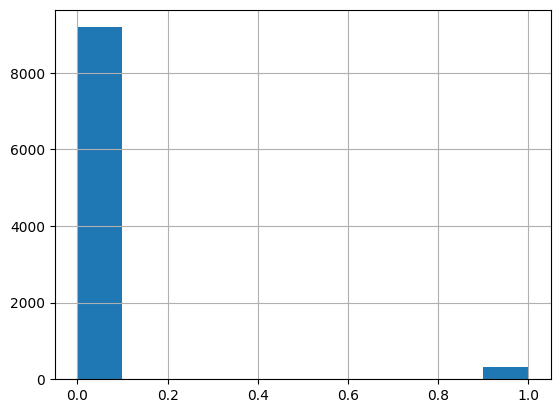

In [13]:
# measuring skewness 
# Begin with our dependant variable "Machine failure". As it's binary data, we will visualise the frequency of the data 

failure_data_without_null['Machine failure'].hist()

# Strongly biased towards `0` indicating that majority of the data gives information about machines that did NOT fail during the manufacturing process.


In [14]:
# Identify variables with continuous data types. 
# Continous data is defined by data with more than two unique values 
# create a table with the variable names and another column for variable data type 


variable_name = []
variable_description = []


for i in failure_data_without_null.columns:
    variable_name.append(i)
    if failure_data_without_null[i].nunique() > 2:
        variable_description.append("continous data")
    else:
        variable_description.append('other data type')



variable_info = pd.DataFrame({
    'variable_name': variable_name,
    'variable_description': variable_description
})

display(variable_info)



# Scratch work 
    # if failure_data_without_null[i].nunique() > 2:
    #     variable_info.append('continous variable')
    # else:
    #     print('binary')


# for column in df: 
#     if number_of_unique values are > 2 then "continous variable"



,variable_name,variable_description
0,UDI,continous data
1,Product ID,continous data
2,Type,continous data
3,Air temperature [K],continous data
4,Process temperature [K],continous data
5,Rotational speed [rpm],continous data
6,Torque [Nm],continous data
7,Tool wear [min],continous data
8,Machine failure,other data type
9,TWF,other data type


In [15]:
# filter for the variables that are the 'other data type' 

print(failure_data_without_null[['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M']])
# It is clear that all the 'other data types' are binary data 
# change the labelling 
variable_info['variable_description'] = variable_info['variable_description'].replace('other data type', 'binary')


display(variable_info)

# Scratch work 
#variable_info['variable_description'] == 'other data type'

# for i in variable_info['variable_description']:
#     if i == 'other data type':
#         i = 'binary'
#     print(i)

# if i in variable_info['variable_description'] == 'other data type':
#     variable_info['variable_decription'] = 'binary'


      TWF  HDF  PWF  OSF  RNF  H  L  M
0       0    0    0    0    0  0  1  0
1       0    0    0    0    0  0  1  0
2       0    0    0    0    0  0  0  1
3       0    0    0    0    0  0  0  1
4       0    0    0    0    0  0  1  0
...   ...  ...  ...  ...  ... .. .. ..
9995    0    0    0    0    0  0  0  1
9996    0    0    0    0    0  0  0  1
9997    0    0    0    0    0  0  1  0
9998    0    0    0    0    0  0  1  0
9999    0    0    0    0    0  0  1  0

[9516 rows x 8 columns]


,variable_name,variable_description
0,UDI,continous data
1,Product ID,continous data
2,Type,continous data
3,Air temperature [K],continous data
4,Process temperature [K],continous data
5,Rotational speed [rpm],continous data
6,Torque [Nm],continous data
7,Tool wear [min],continous data
8,Machine failure,binary
9,TWF,binary


In [16]:
# use a heatmap to see variables of interest. 
# investigate the skewness of the continous variables 

# sns.heatmap(failure_data_without_null, )

failure_data_without_null.head()
# drop string variables 
    # drop `Product ID` as we have UDI and Type 
    # drop `Type`

#DataTransformation
#failure_data_without_null.drop(['Type', 'Product ID'], axis = 1, inplace=True)

sns.heatmap(failure_data_without_null.corr(), cmap= 'coolwarm' )

#failure_data_without_null

ValueError: could not convert string to float: 'L50595'

In [17]:
corr = failure_data_without_null.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

ValueError: could not convert string to float: 'L50595'

In [18]:
# The dependant variable `Machine failure` is binary, therefore the above Pearsons's correlation approach is only appropriate for two continous variables. 
# Use Point-biserial correlation coefficient (PBC) instead. This is specifically designed for the case where the dependant variable is binary.



#### Point-biserial correlation
- It ranges from −1 to 1, where −1 indicates a perfect negative association between the variables, 0 indicates no association, and 1 indicates a perfect positive association.

In [19]:
# Example using the dependant variable and `Air Temperature `

# Calculate the point-biserial correlation and p-value
r_pb, p_value = pointbiserialr(failure_data_without_null['Machine failure'], failure_data_without_null['Air temperature [K]'])

# Print the results with an explainable statement
print(f"The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is {round(r_pb, 3)} with a p-value of {round(p_value, 4)}.")
print("The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).")

# Interpretation of the p-value
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation.")

# Interpretation of the r_pb value
if r_pb > 0:
    direction = "positive"
else:
    direction = "negative"

strength = ""
abs_r_pb = abs(r_pb)
if abs_r_pb < 0.1:
    strength = "negligible"
elif abs_r_pb < 0.3:
    strength = "weak"
elif abs_r_pb < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"The correlation is {direction} and the strength of the correlation is {strength}.")


The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is 0.077 with a p-value of 0.0.
The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.
The correlation is positive and the strength of the correlation is negligible.


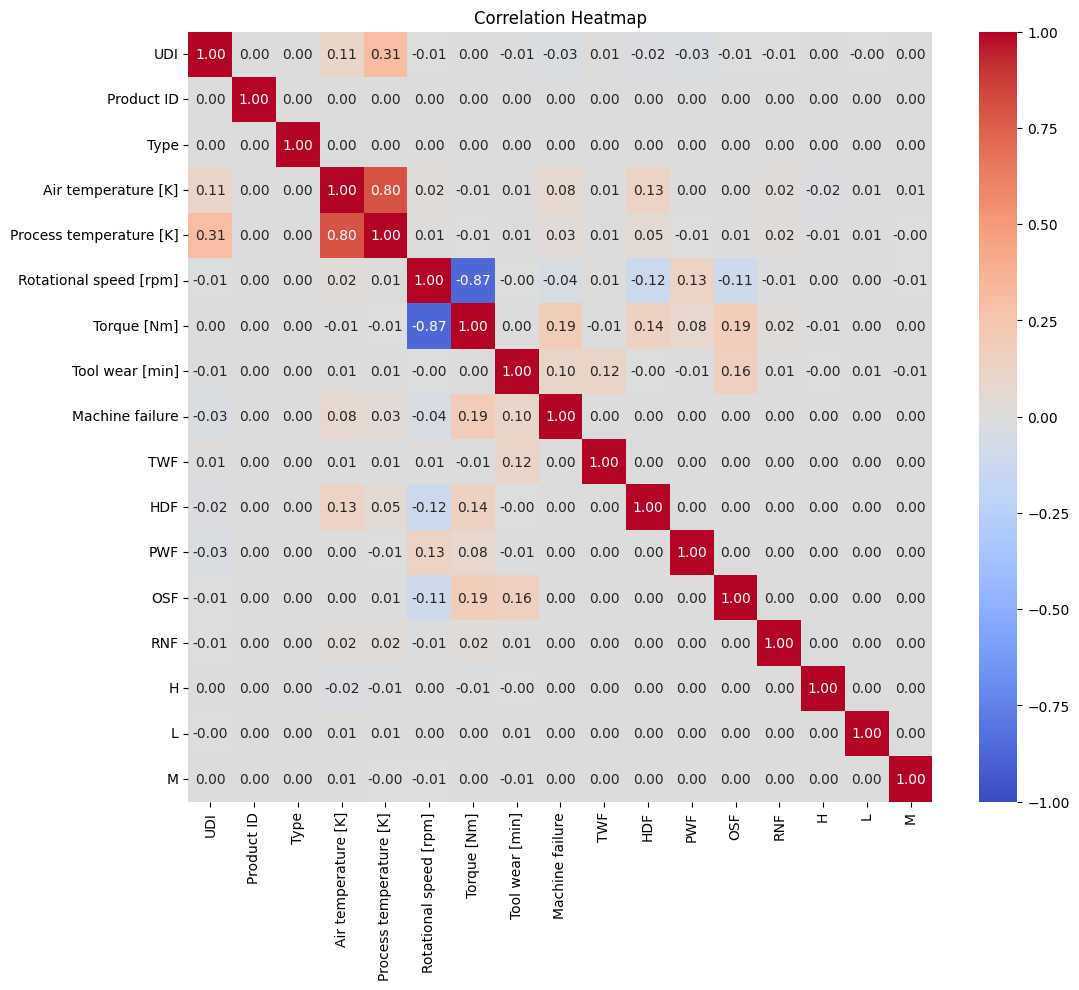

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Identify binary and continuous variables
binary_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].nunique() == 2]
continuous_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].dtype in ['int64', 'float64'] and failure_data_without_null[col].nunique() > 2]

# Initialize the correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(failure_data_without_null.columns), len(failure_data_without_null.columns))), index=failure_data_without_null.columns, columns=failure_data_without_null.columns)

# Compute correlations
for var1 in failure_data_without_null.columns:
    for var2 in failure_data_without_null.columns:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  # Correlation with itself is 1
        elif var1 in binary_vars and var2 in continuous_vars:
            r_pb, _ = pointbiserialr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pb
            corr_matrix.loc[var2, var1] = r_pb
        elif var1 in continuous_vars and var2 in continuous_vars:
            r_pearson, _ = pearsonr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pearson
            corr_matrix.loc[var2, var1] = r_pearson

# Plot the heatmap with annotations rounded to 2 decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
# There is neither a strong positive or negative correlation between `Machine failure` and the independant variables. Look at mesuring skewness of each continous variables

In [21]:
info.continous_variables()

AttributeError: module 'DataFrameInfo_class' has no attribute 'continous_variables'

In [22]:
# Define a function for skewness
    # Takes in the data frame 

info = DataFrameInfo(failure_data_without_null)
# info.normal_test(column_name="UDI")
# info.column_names()

normal_test_result = []

for i in info.continous_variables():
    print(i)
    print('\n')
    print(f'{i} :')
    normal_test_result.append(info.normal_test(i))


    # if p < 0.01:
    #     print('reject the null hypothesis. The data is skewed')
    # else:
    #     print('accept the null hypothesis. The data is normally distributed')

# TODO: fix this 

UDI


UDI :
Statistics=8041.851, p=0.000
Product ID


Product ID :


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Air temperature [K]


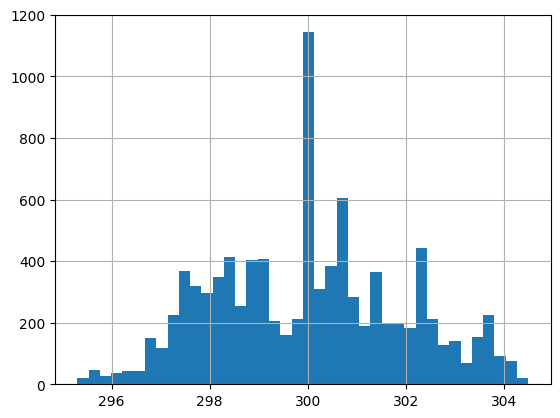

Process temperature [K]


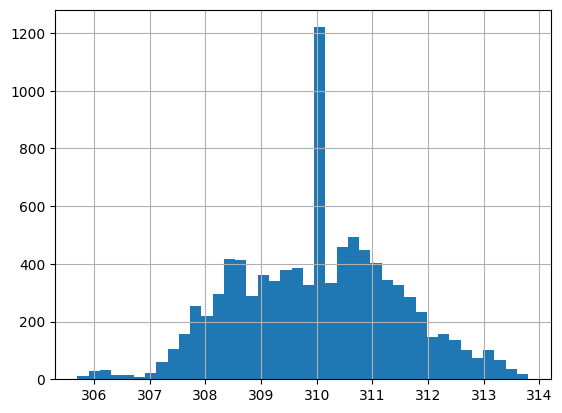

Rotational speed [rpm]


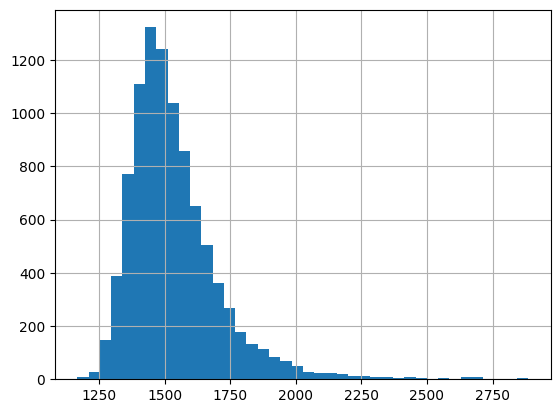

Tool wear [min]


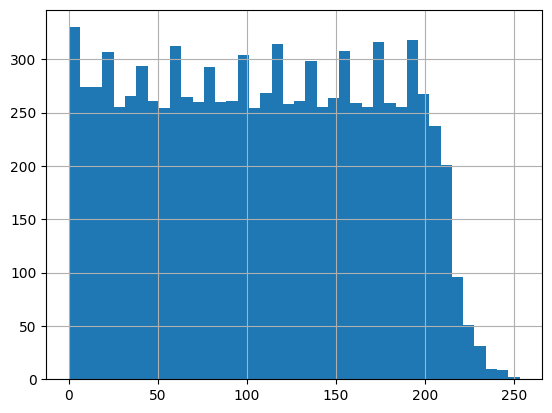

In [23]:
# Reject the null hypothesis for all continous variables apart from `Torque`. As the p-value suggests fairly strong evidence for a normal distribution for `Torque`
# ignore UDI, as it is a label rather than a explanatory variable for `Machine failure`
# visualise the skew for the variables of interest 
    # Air temperature [K]
    # Process temperature [K]
    # Rotational speed [rpm]
    # Tool wear [min]

# create histograms and qq plots for each

plott = Plotter(failure_data_without_null)

skewed_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']
skewed_variables

for i in skewed_variables:
    print(i)
    plott.plot_hist(i)





- Rotational speed [rpm]
- Tool wear [min]



#### Air temperature

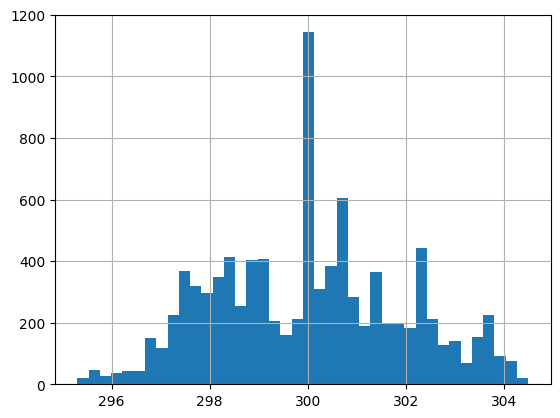

In [24]:
plott.plot_hist('Air temperature [K]')

- `Air temperature [K]`, contains 3 spikes, this likly to for each `Type`. Where the Air temperature is higher 'High' quality products and the converse for low quality products 

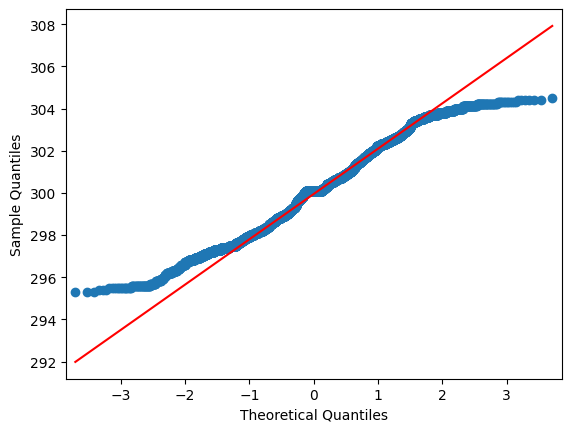

In [26]:
plottm = Plotter(failure_data_without_null)
plott.plot_qq('Air temperature [K]')

- Air Temperature Q-Q plot shows that there is deviation from in the lower and upper quartiles of the data set.

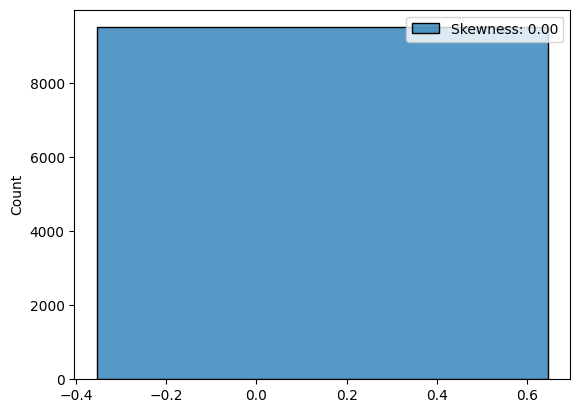

In [27]:
# treating the skewness in Air temperature 
# Box-Cox Transformation. 
    # Motivation - out data is positive 

boxcox_air = failure_data['Air temperature [K]']
boxcox_air = stats.boxcox(boxcox_air) 
boxcox_air = pd.Series(boxcox_air[0])
t=sns.histplot(boxcox_air,label="Skewness: %.2f"%(boxcox_air.skew()) )
t.legend()
# boxcox_air = pd.Series(boxcox_air[0])

In [28]:
# boxcox transformation, did not work as expected, this is because the variance is relatively small, the points are all concentrated. 

failure_data_without_null['Air temperature [K]']

0       301.4
1       300.6
2       299.2
3       298.9
4       298.1
        ...  
9995    297.3
9996    301.6
9997    301.6
9998    300.1
9999    300.7
Name: Air temperature [K], Length: 9516, dtype: float64

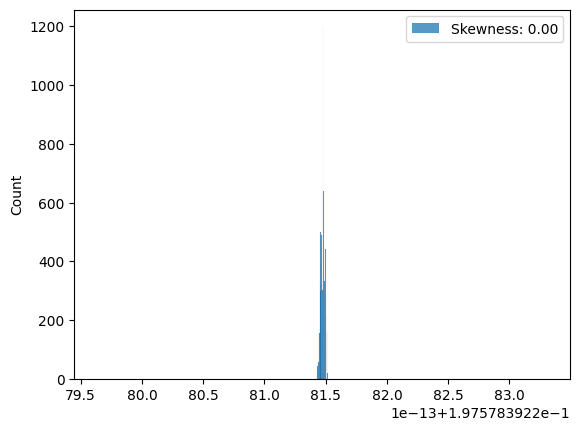

In [29]:
# Yeo Johnson transformation
from scipy.stats import yeojohnson
yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air = stats.yeojohnson(yeojohnson_air)
yeojohnson_air= pd.Series(yeojohnson_air[0])
t=sns.histplot(yeojohnson_air,label="Skewness: %.2f"%(yeojohnson_air.skew()) )
t.legend()


In [ ]:
# The YeoJohnson transformation has successfully transformed the data to be symmetrical. The closer the value to zero, the more symmetrical the data. 


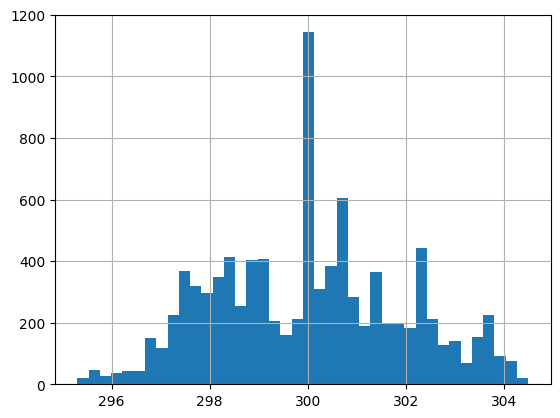

In [31]:
# compare with original distrubution 
plott.plot_hist('Air temperature [K]')

#### Process Temperature [K]

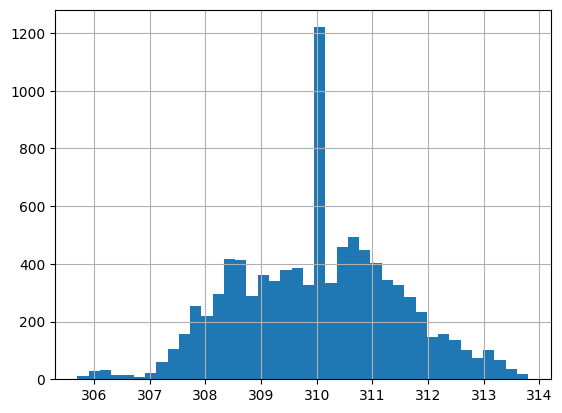

In [32]:
plott.plot_hist('Process temperature [K]')

- Process temperature [K], contains a spike around 310K and slightly negative skew. This is expected as the increase in temperature maybe due to the variation of products involved, as the quality increases, the process temperature increases. Investigate this with a scatter plot of `Type` vs temperature variables.

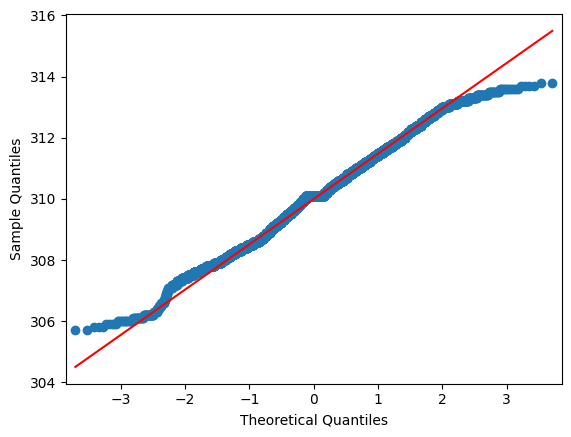

In [33]:
plott.plot_qq('Process temperature [K]')

In [ ]:
ojwodj
# stop here

In [39]:
# info.continous_variables()

# failure_data_without_null['Air temperature [K]'].skew()

failure_data_without_null 

for i in info.continous_variables():
    print('\n')
    print(i)
    skew = failure_data_without_null[i].skew()
    print(skew)
    if skew > 0.1 or skew < -0.1:
        print('data is skewed and needs treatment')

# FIXTHIS 



UDI
0.0033293589128570765


Product ID


KeyError: 'Product ID'

### Rotational speed and Air temperature are the only variables with Skewness. 

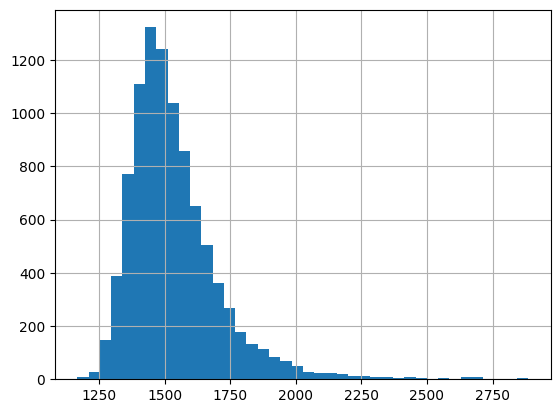

histogram shows a positive skew and supports the skew test


In [40]:
# Rotational speed 

plott.plot_hist('Rotational speed [rpm]')
print('histogram shows a positive skew and supports the skew test')

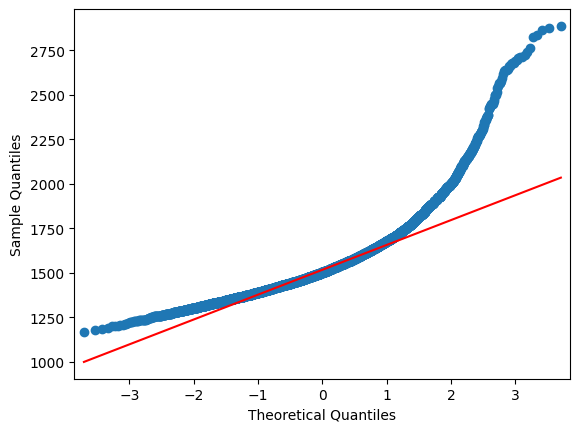

Severe deviation in the upper bound of the data. Slight deviation in the lower bound
proceed with transformation


In [41]:
plott.plot_qq('Rotational speed [rpm]')
print('Severe deviation in the upper bound of the data. Slight deviation in the lower bound')
print('proceed with transformation')

skewness has been reduced, the data is still not symmetrical, proceed with Box-Cox Transformations 


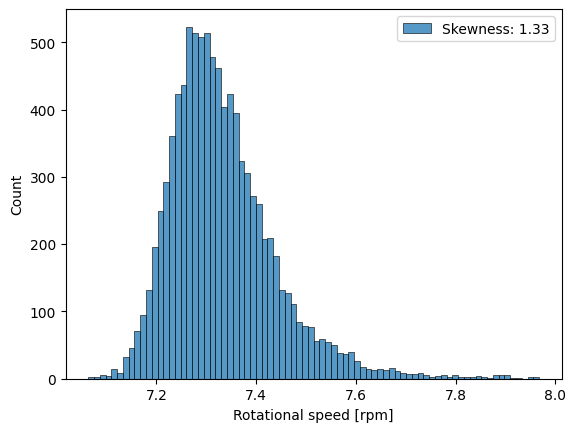

In [42]:
# As the data is positive and rightly skewed, proceed with a box cox transformation 
log_rotational_speed = failure_data_without_null['Rotational speed [rpm]'].map(lambda i: np.log(i) if i > 0 else 0)
t = sns.histplot(log_rotational_speed, label="Skewness: %.2f"%(log_rotational_speed.skew()))
t.legend()
print("skewness has been reduced, the data is still not symmetrical, proceed with Box-Cox Transformations ")

In [43]:
boxcox_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
boxcox_rotational_speed = stats.boxcox(boxcox_rotational_speed)
boxcox_rotational_speed = pd.Series(boxcox_population[0])
t = sns.histplot(boxcox_rotational_speed, label="Skewness: %.2f"%(boxcox_rotational_speed.skew()))
t.legend()

# boxcox_rotational_speed.head()

NameError: name 'boxcox_population' is not defined

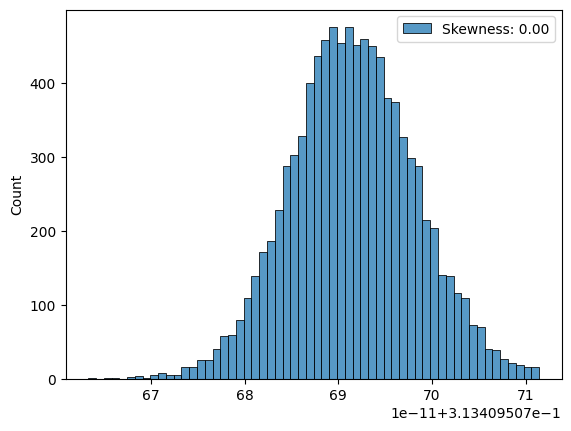

In [44]:
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed[0])
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, label = "Skewness: %.2f"%(yeojohnson_rotational_speed.skew()))
yeojohnson_rotational_speed_hist.legend()



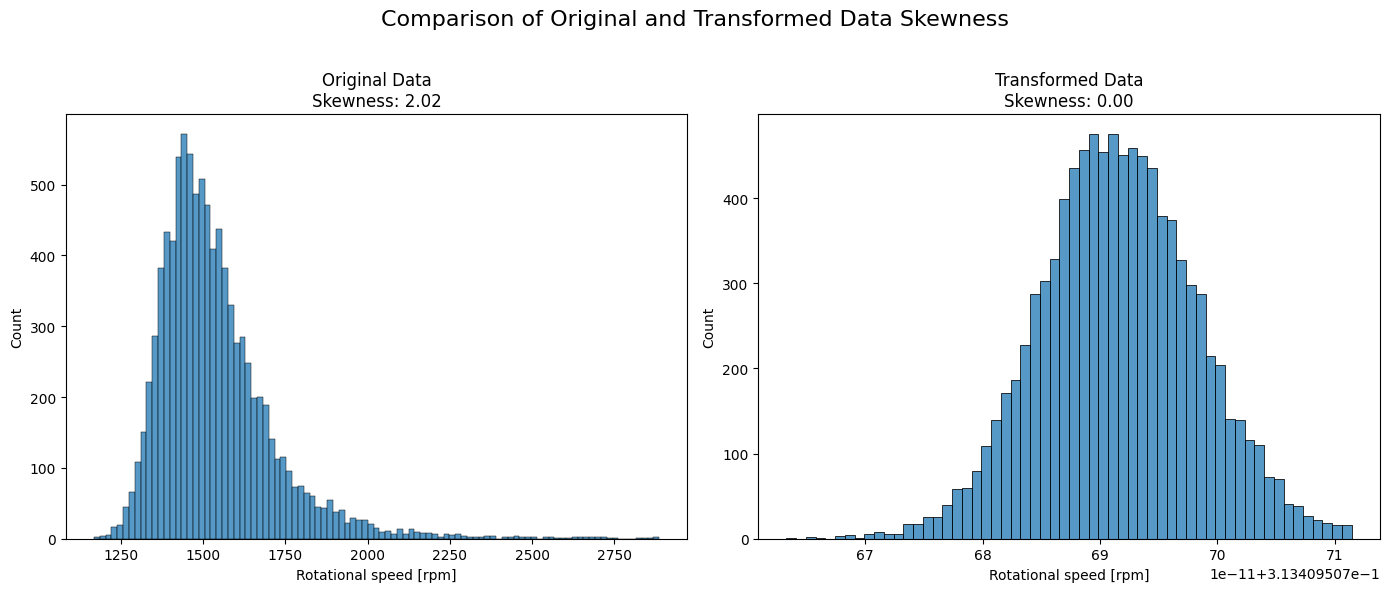

In [45]:
# Rotational Speed Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Rotational speed [rpm]', ax=ax[0])
original_skewness = failure_data_without_null['Rotational speed [rpm]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Rotational speed [rpm]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, ax=ax[1])

transformed_skewness = yeojohnson_rotational_speed.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Rotational speed [rpm]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [46]:
# data transformation 
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)


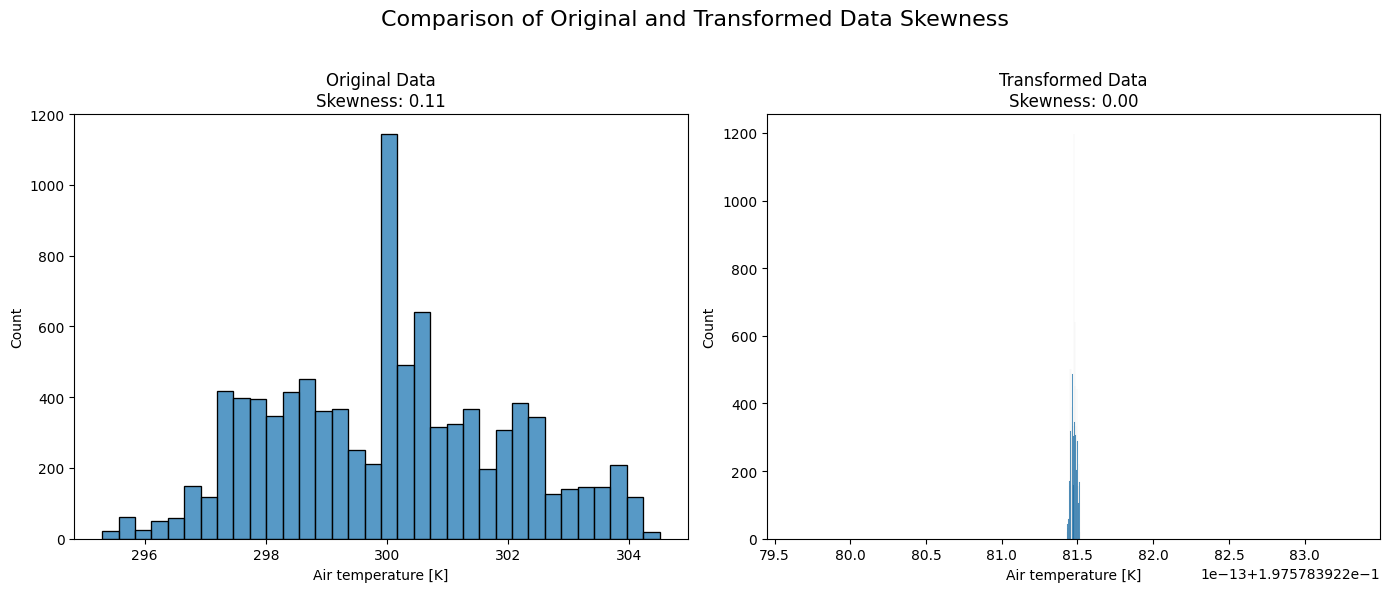

In [47]:
# Do the same for Air Temperature

# Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Air temperature [K]', ax=ax[0])
original_skewness = failure_data_without_null['Air temperature [K]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Air temperature [K]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air, _ = stats.yeojohnson(yeojohnson_air) # The '_' ignores the second parameter, in this case it is the lambda parameter 
yeojohnson_air = pd.Series(yeojohnson_air)
yeojohnson_air_hist = sns.histplot(yeojohnson_air, ax=ax[1])
transformed_skewness = yeojohnson_air.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Air temperature [K]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Next steps:
- replace the yeojohnson transformation to air & rotational speed in the orginal data set 
# khurmi



#### Now use the DataTransformation class to add these transformations  

In [48]:
# Now use the DataTransformation class to add these transformations 

# class DataTransform:
#     def __init__(self, df):
#         self.df = df
#         self.info = df.info()

# yeojohnson_air = failure_data_without_null['Air temperature [K]']
# yeojohnson_air.isnull().

# yeojohnson_air, _ = stats.yeojohnson(yeojohnson_air) # The '_' ignores the second parameter, in this case it is the lambda parameter 
# yeojohnson_air = pd.Series(yeojohnson_air)
# yeojohnson_air

# Create a function for the transformation 
# def yeojohnson(df, column_name):
#     yeojohnson_var = df[column_name]
#     yeojohnson_var, _ = stats.yeojohnson(yeojohnson_var) # The '_' ignores the second parameter, in this case it is the lambda parameter 
#     yeojohnson_var = pd.Series(yeojohnson_var)
#     return yeojohnson_var

# # test 
# yeojohnson(failure_data_without_null, 'Air temperature [K]')

# sns.histplot(data=yeojohnson_air)


# test using the DT class 


# dt = DataTransform(failure_data_without_null)
# dt.yeojohnson('Air temperature [K]')
# dt.yeojohnson('Rotational speed [rpm]')
# reassign the column 

# Data transformation 

# Change the name of the data set for the skewnees transformatoin 




# failure_data_without_null['Air temperature [K]'] = dt.yeojohnson('Air temperature [K]')
# failure_data_without_null['Rotational speed [rpm]'] = dt.yeojohnson('Rotational speed [rpm]')

# # failure_data_without_null.head(10)
# print('The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically')
# # failure_data_without_null.columns

# create a copy of the data set 
failure_data_cleaned_unskewed = failure_data_without_null.copy(deep=True)

# create a Datatransform instance 
dt = DataTransform(failure_data_cleaned_unskewed)

yeojohnson_air = dt.yeojohnson('Air temperature [K]')
yeojohnson_rotational_speed = dt.yeojohnson('Rotational speed [rpm]')

failure_data_cleaned_unskewed['Air temperature [K]'] = yeojohnson_air
failure_data_cleaned_unskewed['Rotational speed [rpm]'] = yeojohnson_rotational_speed

# failure_data_cleaned_unskewed.head()

# sum(failure_data_without_null['Air temperature [K]'].isnull())

In [49]:
print('original data set ')
print('\n')
print(failure_data_without_null[['Air temperature [K]', 'Rotational speed [rpm]']])

original data set 


      Air temperature [K]  Rotational speed [rpm]
0                   301.4                    1579
1                   300.6                    1635
2                   299.2                    1700
3                   298.9                    1561
4                   298.1                    1634
...                   ...                     ...
9995                297.3                    1369
9996                301.6                    1510
9997                301.6                    1408
9998                300.1                    1427
9999                300.7                    1336

[9516 rows x 2 columns]


In [50]:
print('After skewness transformations')
print('\n')
print(failure_data_cleaned_unskewed[['Air temperature [K]', 'Rotational speed [rpm]']])
print('\n')
print('The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically')

# Ask khushboo how tp sort this out.
# TODO: need to change the df  name for after skewness has been applied, this is so that the code is reproducible 

After skewness transformations


      Air temperature [K]  Rotational speed [rpm]
0                0.197578                 0.31341
1                0.197578                 0.31341
2                0.197578                 0.31341
3                0.197578                 0.31341
4                0.197578                 0.31341
...                   ...                     ...
9995                  NaN                     NaN
9996                  NaN                     NaN
9997                  NaN                     NaN
9998                  NaN                     NaN
9999                  NaN                     NaN

[9516 rows x 2 columns]


The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically


In [51]:
info_after_skew_transformation = DataFrameInfo(failure_data_cleaned_unskewed)
print(info_after_skew_transformation.percentage_of_null()[['Air temperature [K]', 'Rotational speed [rpm]']])

print('There is now NaN values in the data set, be aware for the machine learning')

Air temperature [K]       4.844472
Rotational speed [rpm]    4.844472
dtype: float64
There is now NaN values in the data set, be aware for the machine learning


## Removing Outliers from the Data 

### ideas
- scatter plots 
- Violin plots 
- box plots 
- stick to analysis for continous variables 

In [52]:
info = DataFrameInfo(failure_data_cleaned_unskewed)
info.continous_variables()

continous_variables = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]']

 # Note the following variables were not included because they are either strings or unique keys, both have no statistical significance
    #'UDI',
    #'Product ID',
    #'Type'

continous_variables


['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [332]:
# scatter plot 

# for i in continous_variables:
#     print(i)
#     print(sns.scatterplot(failure_data_without_null[i]))


# sns.scatterplot(failure_data_without_null['Air temperature [K]'])

# plott = Plotter(failure_data_without_null)
# plott.scatter('Air temperature [K]')

# Do this for the rest of the variables too 
# decide whether or not use the df treated for skew 


In [333]:
# # using the df treated for skew 
# plott = Plotter(failure_data_cleaned_unskewed)
# plott.scatter('Air temperature [K]')

In [331]:
# # Scatter plots of continous variables 
# plott = Plotter(failure_data_cleaned_unskewed)

# for i in continous_variables:
#     print(i)
#     plott.scatter(i)

In [ ]:
## Scatter plot analysis:

# 'Air temperature [K]'
# - No visible outliers

# 'Process temperature [K]'
# - Outliers in the upper & lower bounds 

# 'Rotational speed [rpm]'
# -Outliers in the upper & lower bounds Outliers in the upper & lower bounds 

# 'Torque [Nm]'
# - Outliers in the upper & lower bounds Outliers in the upper & lower bounds 

# 'Tool wear [min]'
# - Outliers in the upperbound 


##### Boxplot was more useful to see outliers

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


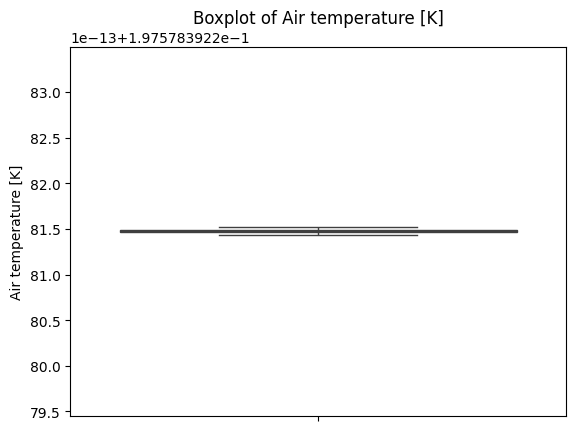

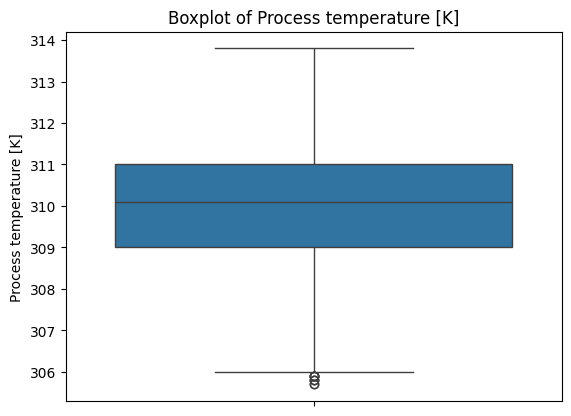

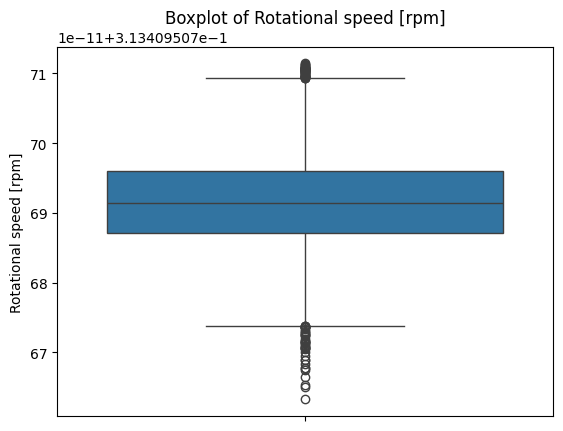

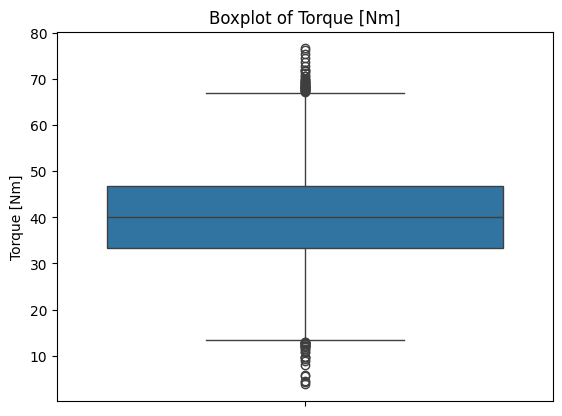

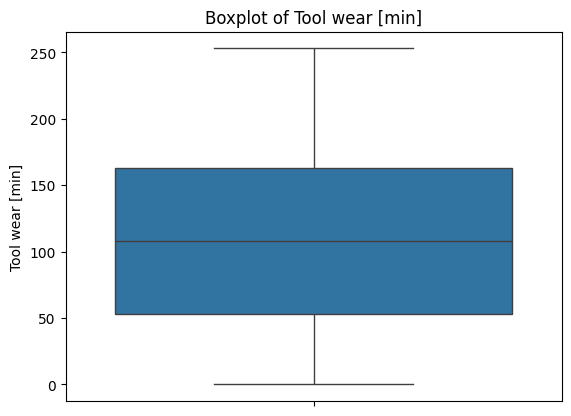

In [53]:
# box plots of continous variables 
# plott = Plotter(failure_data_cleaned_unskewed)

# for i in continous_variables:
#     print(i)

print(continous_variables)

for i in continous_variables:
    plt.figure()
    sns.boxplot(failure_data_cleaned_unskewed[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

# Note: Boxplot is a much better visual representation, do z score analysis for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'




- Boxplots for Air Temperature & Torque variables show no significant outliers. 
- Boxplots for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' do show outliers, proceed with z-score analysis to segment potential outliers 

## Z - Score analysis for `Process temperature [K]`, `Rotational speed [rpm]` and `Torque [Nm]`

## Process Temperature

In [54]:
# def z_score(df, column): # takes in a column and creates z scores, 
#     x = df[column] 
#     mean= np.mean(x)
#     standard_deviation = np.std(x)
#     z_scores = (x - mean) / standard_deviation
#     return z_scores

# z_score(failure_data_cleaned_unskewed, 'Process temperature [K]').tail(10)
# # Add this to DT class 
    


       UDI  Process temperature [K]  z_scores
9990  9043                    308.4 -1.143308
9991   138                    308.6 -1.002286
9992  6650                    310.4  0.266904
9993  1383                    310.1  0.055373
9994  9314                    309.4 -0.438202
9995  9018                    308.1 -1.354839
9996  3339                    310.9  0.619457
9997  5771                    311.2  0.830989
9998  3056                    309.2 -0.579223
9999  6026                    311.0  0.689968
Axes(0.125,0.11;0.775x0.77)


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_87846/3455729718.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udi_process_temp_df_z['z_scores'] = z_scores_process_temp


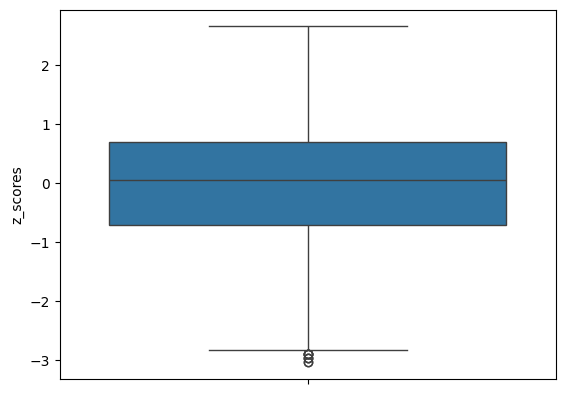

In [62]:
# Statistcal Methods for outlier detection 
udi_process_temp_df = failure_data_cleaned_unskewed[['UDI','Process temperature [K]']]
process_temp = udi_process_temp_df['Process temperature [K]']

# process_temp.head()
mean_process_temp = np.mean(process_temp)
std_process_temp = np.std(process_temp)
z_scores_process_temp = (process_temp - mean_process_temp) / std_process_temp

# change the name of the dataframe 
udi_process_temp_df_z = udi_process_temp_df

# Add the z-scores to the dataframe as a new column:
udi_process_temp_df_z['z_scores'] = z_scores_process_temp

print(udi_process_temp_df_z.tail(10))
print(sns.boxplot(udi_process_temp_df_z['z_scores']))

- There are outliers below -3 for the Z scores.

In [251]:
# # Statistcal Methods for outlier detection 
# process_temp_df = failure_data_cleaned_unskewed[['UDI','Process temperature [K]']]

# # process_temp.head()
# mean_process_temp = np.mean(process_temp_df['Process temperature [K]'])
# std_process_temp = np.std(process_temp_df['Process temperature [K]'])
# z_scores_process_temp = (process_temp_df['Process temperature [K]'] - mean_process_temp) / std_process_temp
# process_temp_df_z = process_temp_df

# # Add the z-scores to the dataframe as a new column:
# process_temp_df_z['z_scores'] = z_scores_process_temp

# print(process_temp_df_z.tail(10))

# print(sns.scatterplot(process_temp_df_z['z_scores']))

# # change variable names 

In [64]:
# isolate outliers 

# outliers_2 = []
# outliers_3 = []

# for i in process_temp_df_z['z_scores']:
#     if i < -2:
#         outliers_2.append(i)
#     if i > 2:
#         outliers_2.append(i)

# Z-score Threshold 
threshold_2 = 2 
threshold_3 = 3 

z_scores = udi_process_temp_df_z['z_scores']

outliers_2 = udi_process_temp_df_z[np.abs(z_scores) > threshold_2]
outliers_3 = udi_process_temp_df_z[np.abs(z_scores) > threshold_3]

percentage_outliers_thereshold_2 = round(len(outliers_2)/len(udi_process_temp_df_z) * 100, 2)
percentage_outliers_thereshold_3 = round(len(outliers_3)/len(udi_process_temp_df_z) * 100, 2)


# print(f"Percentage of observations with outliers based on z-score threshold ±2: {round(len(outliers_2)/len(process_temp_df_z) * 100, 2)}")
# print(f"Percentage of observations with outliers based on z-score threshold ±3: {round(len(outliers_3)/len(process_temp_df_z) * 100, 2)}")

print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")
#khurmi
# TODO: convert this into a function and add to the relevant classes 
    # func for z-scores of a variable 
    # func z_score_info

Percentage of observations with outliers based on z-score threshold ±2: 4.07
Percentage of observations with outliers based on z-score threshold ±3: 0.02


#### Choosing between a Z-Score Threshold of 2 and 3 
- Given that we dealing with failure data in the manufacturing process, the conseqences of missing a potential failure can be severe. 
- Therefore, consider the more sensitive approach of a threshold of 2.

Pros: more sensitive to deteching smaller anomalies which might be early indicators of potential failures

Cons: Higher number of false positives, meaning more frequent alerts and possibly unnecessary inspections or interventions

Suggested approach (Post implementation):
- Begin with a z-score of 2 i.e. beginning more conservative and increasing based on future data.
- Monitor & Adjust: monitor the alerts and evaluate the relevance of outliers.

#### Filtering 

In [65]:
#filter out the outliers of Process Temperature from our main data set
outliers_2

#failure_data_cleaned_unskewed['UDI'].head()

mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

mask.sum()
failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]


print('Number of rows of original df:')
print(len(failure_data_cleaned_unskewed))
print('\n')
print('Number of rows after filtering the Outliers of the Process Temperature:')
print(len(failure_data_cleaned_unskewed_no_outliers))

Number of rows of original df:
9516


Number of rows after filtering the Outliers of the Process Temperature:
9129


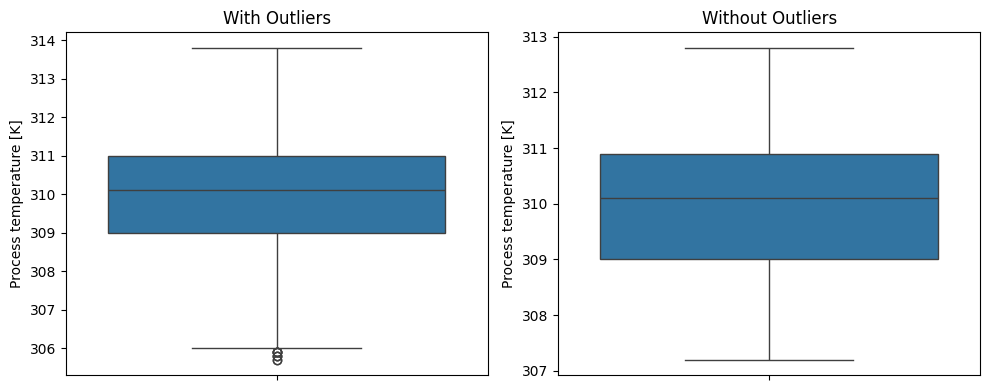

In [66]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First plot: With outliers
sns.boxplot(data=failure_data_cleaned_unskewed, y='Process temperature [K]', ax=axes[0])
axes[0].set_title('With Outliers')

# Second plot: Without outliers
sns.boxplot(data=failure_data_cleaned_unskewed_no_outliers, y='Process temperature [K]', ax=axes[1])
axes[1].set_title('Without Outliers')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# TODO: make the joint boxpolots have the same scale 

In [350]:
# plott_1 = Plotter(failure_data_cleaned_unskewed)
# plott_1.boxplot('Process temperature [K]')

# plott_2 = Plotter(failure_data_cleaned_unskewed_no_outliers)
# plott_2.boxplot('Process temperature [K]')

### Updating classes with z_score and z_score_info functions

In [67]:
# adding a function that gives z score information to the DataInformation Class

def z_score_info(z_scores):
    # Z-score Threshold 
    threshold_2 = 2 
    threshold_3 = 3
    # z_scores = udi_process_temp_df_z['z_scores']

    outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
    outliers_3 = (np.abs(z_scores) > threshold_3).sum()


    percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
    percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
    print("\n")
    print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
    print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

# testing 

#create z_scores 
# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]').tail(10)
# z_scores_test = z_score(failure_data_cleaned_unskewed, 'Process temperature [K]')

# z_score_info(z_scores_test)
# # boolean_values = np.abs(z_scores_test) > 3
# boolean_values.sum()




In [334]:
# Testing the z_score_info()
# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]')
# z_scores_test = z_score(failure_data_cleaned_unskewed, 'Process temperature [K]')

# info = DataFrameInfo(failure_data_cleaned_unskewed)
# info.z_score_info(z_scores_test)
# # info.z_score_info() # problem with class 


In [307]:
# class DataFrameInfo:
#     def __init__(self, df):
#         self.df = df 
#     def z_score_info(self, z_scores):
#         # Z-score Threshold 
#         threshold_2 = 2 
#         threshold_3 = 3
#         # z_scores = udi_process_temp_df_z['z_scores']

#         outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
#         outliers_3 = (np.abs(z_scores) > threshold_3).sum()

#         percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
#         percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
#         print("\n")
#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

## Rotational speed

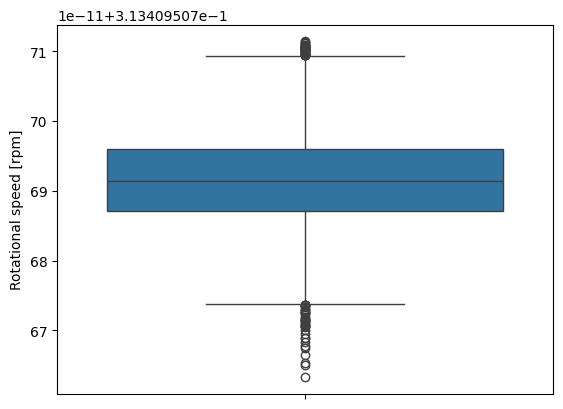

Outliers in both upper and lower bounds of the data


In [68]:
# rename data set 
failure_data_cleaned_v2 = failure_data_cleaned_unskewed_no_outliers
plott = Plotter(failure_data_cleaned_v2)
plott.boxplot('Rotational speed [rpm]')

print('Outliers in both upper and lower bounds of the data')


Number of NULL values in Rotational Speed z-scores
446


Number of NULL values in Rotational Speed z-scores after dropping NULL values
0


Text(0.5, 1.0, 'Rotational speed Z-Scores ')

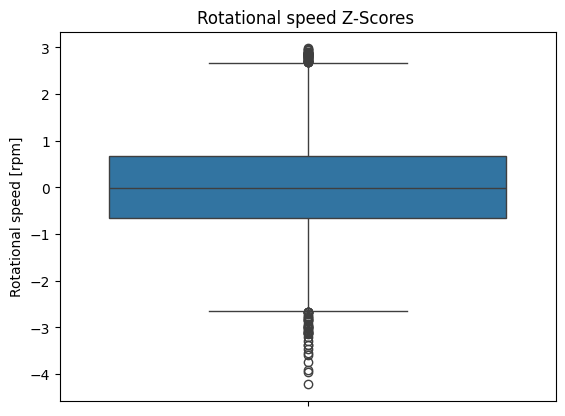

In [69]:
# z score analysis

dt = DataTransform(failure_data_cleaned_v2)
rotational_speed_z = dt.z_score('Rotational speed [rpm]')

print('Number of NULL values in Rotational Speed z-scores')
print(rotational_speed_z.isnull().sum()) # 446 null values 

# drop null values for the analysis 
rotational_speed_z_cleaned = rotational_speed_z.dropna()

print('\n')
print('Number of NULL values in Rotational Speed z-scores after dropping NULL values')
print(rotational_speed_z_cleaned.isnull().sum())

sns.boxplot(rotational_speed_z_cleaned).set_title('Rotational speed Z-Scores ')


# rotational_speed_z_cleaned
# plott = Plotter(failure_data_cleaned_v2)
# plott.boxplot(rotational_speed_z_cleaned )

# Many null values 


# process_temp_test = dt.z_score('Process temperature [K]')
# process_temp_test.isnull().sum()
# no null values for process temp's z scores 


# info = DataFrameInfo(failure_data_cleaned_v2)
# info.z_score_info(rotational_speed_z) 

# filtering 

Number of NULL values in Rotational Speed z-scores POST Skew Transoformation
446


Text(0.5, 1.0, 'Rotational speed Z-Scores ')
UDI case `1271` BEFORE treating for skew:
1490


UDI case `1271` AFTER treating for skew:
nan


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_87846/2987502788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotational_speed['z_scores'] = dt.z_score('Rotational speed [rpm]')


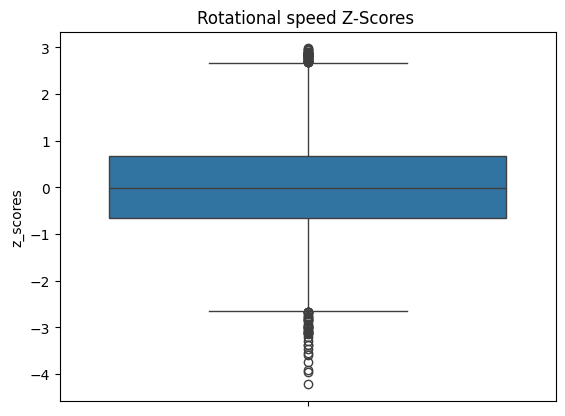

In [70]:
# Next steps:
# Note here: could we consider removing only the upper boiund
# drop rows based on the outliers for the rotational speed 

rotational_speed = failure_data_cleaned_v2[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed)
rotational_speed['z_scores'] = dt.z_score('Rotational speed [rpm]')
rotational_speed

print('Number of NULL values in Rotational Speed z-scores POST Skew Transoformation')
print(rotational_speed['z_scores'].isnull().sum()) # 446 null, need to drop 
print('\n')
# Boxplot 
print(sns.boxplot(rotational_speed['z_scores']).set_title('Rotational speed Z-Scores '))

# take a look at why there are NULL values when
# deep dive into 1 use case 
rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]

rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]['UDI'] # UDI 1272

rotational_speed[rotational_speed['UDI'] == 1272] # Rotational speed has NaN values after the skewness transformation. 


# check orginal data frame 
rotational_speed_value_udi_1272 = failure_data_without_null.loc[failure_data_without_null['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]

print('UDI case `1271` BEFORE treating for skew:')
print(rotational_speed_value_udi_1272)
print('\n')
rotational_speed_value_udi_1272_after_skew = failure_data_cleaned_unskewed.loc[failure_data_cleaned_unskewed['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]
print('UDI case `1271` AFTER treating for skew:')
print(rotational_speed_value_udi_1272_after_skew )

##########################################
# Use the less stringent -3 & 3 Z_score threshold 

# Adapt z_score_info function to input the z-score threshold via the user

# filter for z scores of absoulte value 

# def z_score_outliers( z_score, abs_threshold = [[2,3]]):
#     outliers = np.abs(z_score) > abs_threshold 
#     return outliers 


# z_score_outliers(rotational_speed_z_cleaned, abs_threshold=3)

# not a good approach, adapt func to include data set where we can put in a key which in our case UDI 

# failure_data_cleaned_v2

# PICKUP: Continue with dropping outliers for Rotational speed & the last continous variable
# move onto task 6 





### Dopping NULL values in the Rotational speed variable

In [71]:

# The transformation to treat skewness has produced NULL values
# For simplicity I will drop the rows for these NULL values

# Drop null values 
rotational_speed_clean = rotational_speed[rotational_speed['z_scores'].notnull()]

# list of UDIs to keep
udi_to_keep = rotational_speed_clean['UDI']

# create a boolean mask to identify rows to keep 
mask = failure_data_cleaned_v2['UDI'].isin(udi_to_keep)
#mask.value_counts()

# filtered data frame 
failure_data_cleaned_v3 = failure_data_cleaned_v2[mask]

In [72]:
# testing the transformation
print(f"length before filtering: {len(failure_data_cleaned_v2)}")
print(f"length after dropping NULL values in Rotational speed: {len(failure_data_cleaned_v3)}")

print('Number of missing values in Rotational speed:')
print(failure_data_cleaned_v3['Rotational speed [rpm]'].isnull().sum())


length before filtering: 9129
length after dropping NULL values in Rotational speed: 8683
Number of missing values in Rotational speed:
0


In [78]:
# do the z-score analysis with the cleaned data set
rotational_speed_v3 = failure_data_cleaned_v3[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed_v3)
rotational_speed_v3['z_scores'] = dt.z_score('Rotational speed [rpm]')

# check that there are no null values 
rotational_speed_v3.isnull().sum()

# sns.boxplot(rotational_speed_v3['z_scores']) 


# TODO: remove outliers based on a threshold of 3 

# boolean of outliers 
rotational_speed_outliers_mask = np.abs(rotational_speed_v3['z_scores']) > 3
rotational_speed_outliers = rotational_speed_v3[rotational_speed_outliers_mask]

rotational_speed_outliers['UDI']

# mask = rotational_speed_outliers['UDI']

# rotational_speed_outliers.value_counts()

# # mask = failure_data_cleaned_v3['UDI'].isin(rotational_speed_outliers['UDI'])
# # mask.value_counts()

# mask = ~rotational_speed_outliers 
# mask.value_counts()



# Aim;
# df with UDI and  


# # filter
# 

##############################################################################
# Idea 
#filter out the outliers of Process Temperature from our main data set
# outliers_2

# #failure_data_cleaned_unskewed['UDI'].head()

# mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

# mask.sum()
# failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]

##############################################################################


# rotational_speed_removed_outliers = rotational_speed_v3[rotational_speed_outliers]

# sns.boxplot(rotational_speed_removed_outliers['z_scores'])



# info = DataFrameInfo(rotational_speed_v3)
# info.z_score_info('Rotational speed [rpm]')

rotational_speed_outliers['UDI']

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_87846/368438114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotational_speed_v3['z_scores'] = dt.z_score('Rotational speed [rpm]')


22      8571
392     9393
847     9747
1525    9199
2772    7556
3198    9828
3784    9715
3813     749
3860    6980
3908    2124
4064    2852
4444    4495
4632    5704
4880    4727
6645     222
7215    7957
7272      72
7298    1532
7702    6089
9393    2082
Name: UDI, dtype: int64

In [74]:
outliers_udis = rotational_speed_outliers['UDI'].tolist()

failure_data_cleaned_v3
mask = ~rotational_speed_v3 ['UDI'].isin(outliers_udis)

In [75]:

# Step 1: Extract the list of UDIs from the outliers DataFrame
outliers_udis = rotational_speed_outliers['UDI'].tolist()

# Step 2: Filter the original DataFrame to exclude the rows with these UDIs
failure_data_cleaned_v3
mask = ~rotational_speed_v3['UDI'].isin(outliers_udis) 

failure_data_cleaned_v4 = failure_data_cleaned_v3[mask]

# # Display the filtered DataFrame
# len(rotational_speed_no_outliers)

# sns.boxplot(rotational_speed_no_outliers['z_scores'])
# sns.boxplot(rotational_speed_v3['z_scores']) 


In [84]:
failure_data_cleaned_v3['Rotational speed [rpm]'].isnull().sum()

print(len(failure_data_cleaned_v3))
len(failure_data_cleaned_v4)

8683


8663

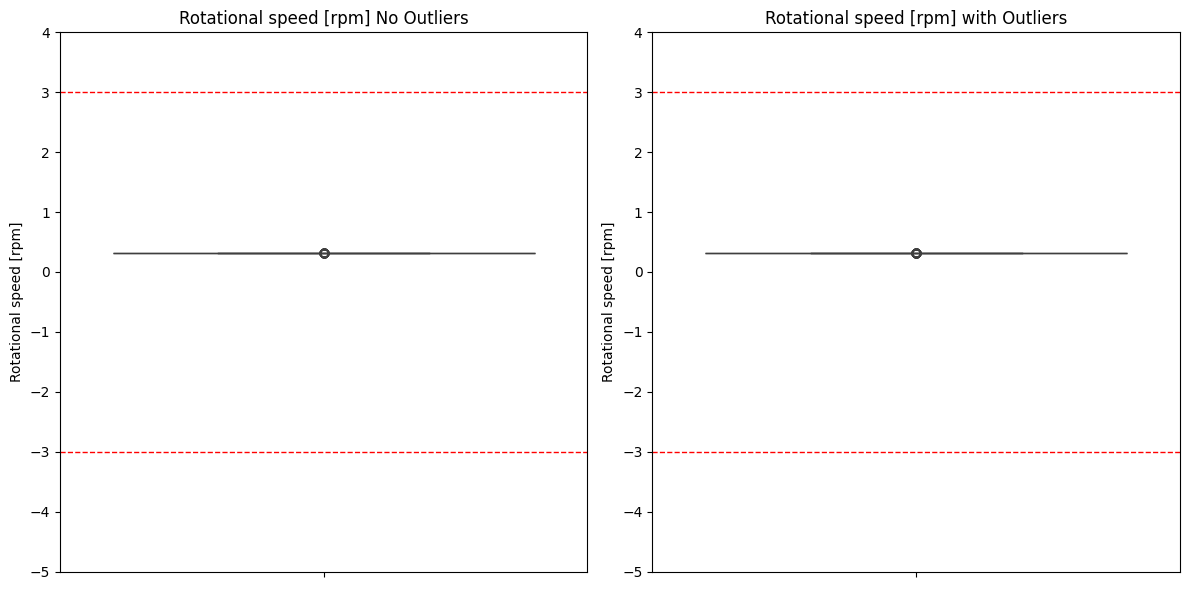

In [85]:
# Create subplots with a smaller figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (-5, 4)

# First plot: No outliers
sns.boxplot(data=failure_data_cleaned_v4, y='Rotational speed [rpm]', ax=axes[0])
axes[0].set_title('Rotational speed [rpm] No Outliers')
axes[0].set_ylim(y_limits)
axes[0].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Second plot: With outliers
sns.boxplot(data=failure_data_cleaned_v3, y='Rotational speed [rpm]', ax=axes[1])
axes[1].set_title('Rotational speed [rpm] with Outliers')
axes[1].set_ylim(y_limits)
axes[1].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'rotational_speed_no_outliers' is not defined

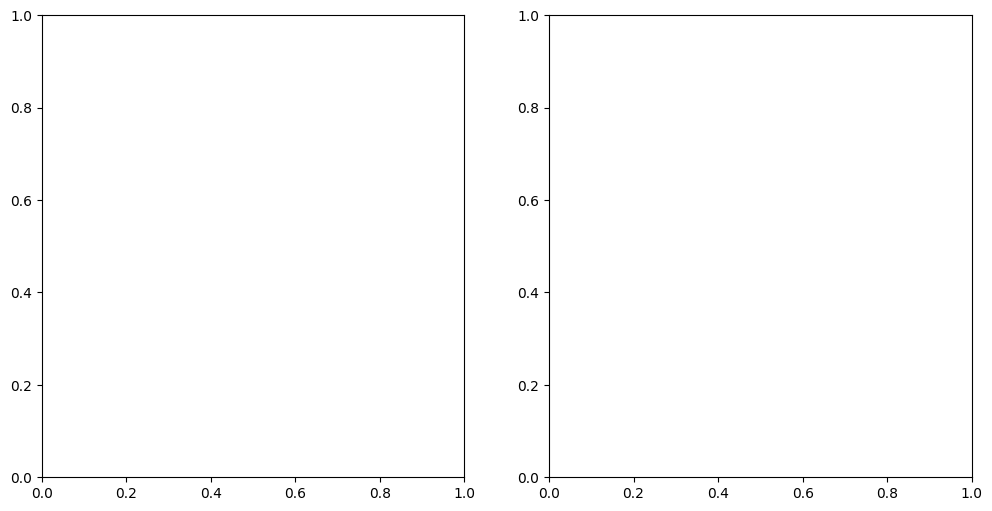

In [76]:
# Create subplots with a smaller figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (-5, 4)

# First plot: No outliers
sns.boxplot(data=rotational_speed_no_outliers, y='z_scores', ax=axes[0])
axes[0].set_title('Rotational speed [rpm] No Outliers')
axes[0].set_ylim(y_limits)
axes[0].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Second plot: With outliers
sns.boxplot(data=rotational_speed_v3, y='z_scores', ax=axes[1])
axes[1].set_title('Rotational speed [rpm] with Outliers')
axes[1].set_ylim(y_limits)
axes[1].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [86]:
# make changes to data set i.e. the filtering etc.
# first begin with reproducing the above plot using the failure_data df's, as using a subset for the plots will create issues later on, check this for the Air temperature variable too.

# TODO: failure_data_cleaned_v4 has been deleted. Rename this
failure_data_cleaned_v4['Rotational speed [rpm]'].isnull().sum()
print(f"length of data frame after dropping outliers for Rotational speed [rpm]: {len(failure_data_cleaned_v4)}") # Expect 8863
# Idea: look at the relationship of machine failures with the upperbounds of the continous variables.

length of data frame after dropping outliers for Rotational speed [rpm]: 8663


## Treating Outliers in `Torque [Nm]` 


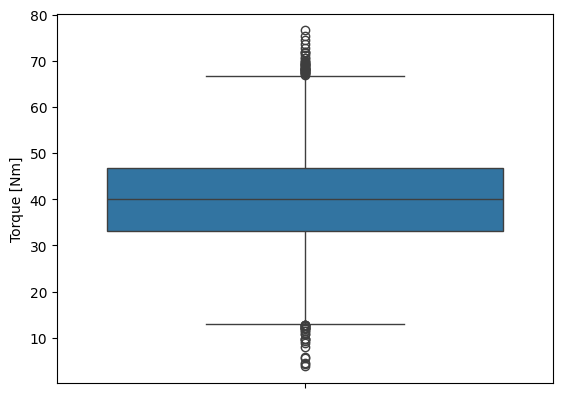

In [87]:
plott = Plotter(failure_data_cleaned_v4)
plott.boxplot('Torque [Nm]')

- Outliers in both the upper and lower bound of the data 

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_87846/916459850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_data_cleaned_v4['z_score_torque'] = dt.z_score('Torque [Nm]')


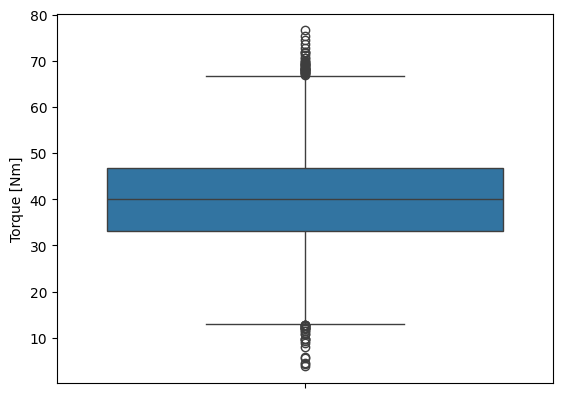

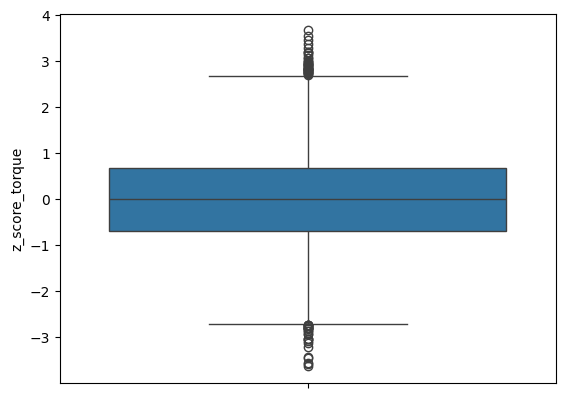

In [88]:
# z scores 

dt = DataTransform(failure_data_cleaned_v4)
dt.z_score('Torque [Nm]').isnull().sum()
# no null values 

failure_data_cleaned_v4['z_score_torque'] = dt.z_score('Torque [Nm]')

plott = Plotter(failure_data_cleaned_v4)
plott.boxplot('Torque [Nm]')
plott.boxplot('z_score_torque')

In [89]:
# rather than z-score to identify outliers, use the quartile ranges. 

# Upper and lower quartiles 
Q1 = failure_data_cleaned_v4['Torque [Nm]'].quantile(0.25)
Q3 = failure_data_cleaned_v4['Torque [Nm]'].quantile(.75)

# 
IQR = Q3 - Q1 

print(f"Q1 (25th percentile): {Q1}")
print(f"Q1 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

torque = failure_data_cleaned_v4['Torque [Nm]']

# Identify outliers 
torque_outliers = failure_data_cleaned_v4[(torque < (Q1 - 1.5 * IQR)) | (torque > (Q3 + 1.5 * IQR))]

print(f'Number of Outliers: {len(torque_outliers)}')
print("\n")
print('Outliers:')
print(torque_outliers)

# Remove outliers 

# create a boolean series 

# this didn't work as it only gives FALSE values, we also need TRUE values 
# mask_torque_outliers = ~torque_outliers['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# mask_torque_outliers
failure_data_cleaned_v4
mask_torque_outliers = ~failure_data_cleaned_v4['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# len(mask_torque_outliers)

# Filtering the data set 
failure_data_cleaned_v5 = failure_data_cleaned_v4[mask_torque_outliers]
print(f"Length of dataframe: {len(failure_data_cleaned_v4)}")
print(f"Length of dataframe: {len(failure_data_cleaned_v5)}")

# # Manish
# # Step 1: Extract the list of UDIs from the outliers DataFrame
# outliers_udis = rotational_speed_outliers['UDI'].tolist()

# # Step 2: Filter the original DataFrame to exclude the rows with these UDIs
# failure_data_cleaned_v3
# mask = ~rotational_speed_v3['UDI'].isin(outliers_udis) 


Q1 (25th percentile): 33.2
Q1 (75th percentile): 46.7
IQR: 13.5
Number of Outliers: 66


Outliers:
       UDI Type  Air temperature [K]  Process temperature [K]  \
97    6179    L             0.197578                    310.9   
374   4297    L             0.197578                    310.2   
404   7764    L             0.197578                    311.6   
433   1325    M             0.197578                    310.1   
448   5335    M             0.197578                    312.6   
...    ...  ...                  ...                      ...   
8920  8004    M             0.197578                    312.0   
9063  7998    M             0.197578                    312.2   
9233  8399    L             0.197578                    309.7   
9328  3580    L             0.197578                    310.6   
9472  4463    L             0.197578                    310.5   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
97                   0.31341         67.9

In [90]:
# create a function to get outliers via IQR df 

def outliers_df_via_IQR(df, column):

    # Upper and lower quartiles 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(.75)

    # 
    IQR = Q3 - Q1 

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q1 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")

    var = df[column]

    # Identify outliers 
    outliers = df[(var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR))]
    return outliers

# testing 
torque_test  = outliers_df_via_IQR(failure_data_cleaned_v4, 'Torque [Nm]')

dt = DataTransform(failure_data_cleaned_v4)

test_df = dt.filter_outliers(outliers_df=torque_test, key_ID='UDI')
test_df

# Proving that the filter works on UDI and not the index of the df 
# dt_2 = DataTransform(test_df)
# dt_2.filter_outliers(outliers_df=torque_test, key_ID ='UDI') # 8597






# print(f'Number of Outliers: {len(torque_outliers)}')
# print("\n")
# print('Outliers:')
# print(torque_outliers)

# # Remove outliers 

# # create a boolean series 

# # this didn't work as it only gives FALSE values, we also need TRUE values 
# # mask_torque_outliers = ~torque_outliers['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# # mask_torque_outliers
# failure_data_cleaned_v4
# mask_torque_outliers = ~failure_data_cleaned_v4['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# # len(mask_torque_outliers)

# # Filtering the data set 
# failure_data_cleaned_v5 = failure_data_cleaned_v4[mask_torque_outliers]
# print(f"Length of dataframe: {len(failure_data_cleaned_v4)}")
# print(f"Length of dataframe: {len(failure_data_cleaned_v5)}")

Q1 (25th percentile): 33.2
Q1 (75th percentile): 46.7
IQR: 13.5
length of original df: 8663
length of filtered df: 8597


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
0,3416,L,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0,-0.307951
1,7130,L,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0,-0.899668
2,2320,M,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1,-0.648940
3,9601,M,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1,0.534495
4,614,L,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0,-0.999960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,3538,M,0.197578,311.0,0.31341,21.5,20.0,0,0,0,0,0,0,0,0,1,-1.852435
9512,9852,M,0.197578,309.3,0.31341,27.2,49.0,0,0,0,0,0,0,0,0,1,-1.280775
9513,9015,M,0.197578,308.1,0.31341,61.3,207.0,1,0,0,0,1,0,0,0,1,2.139154
9514,5895,L,0.197578,310.9,0.31341,37.9,164.0,0,0,0,0,0,0,0,1,0,-0.207659


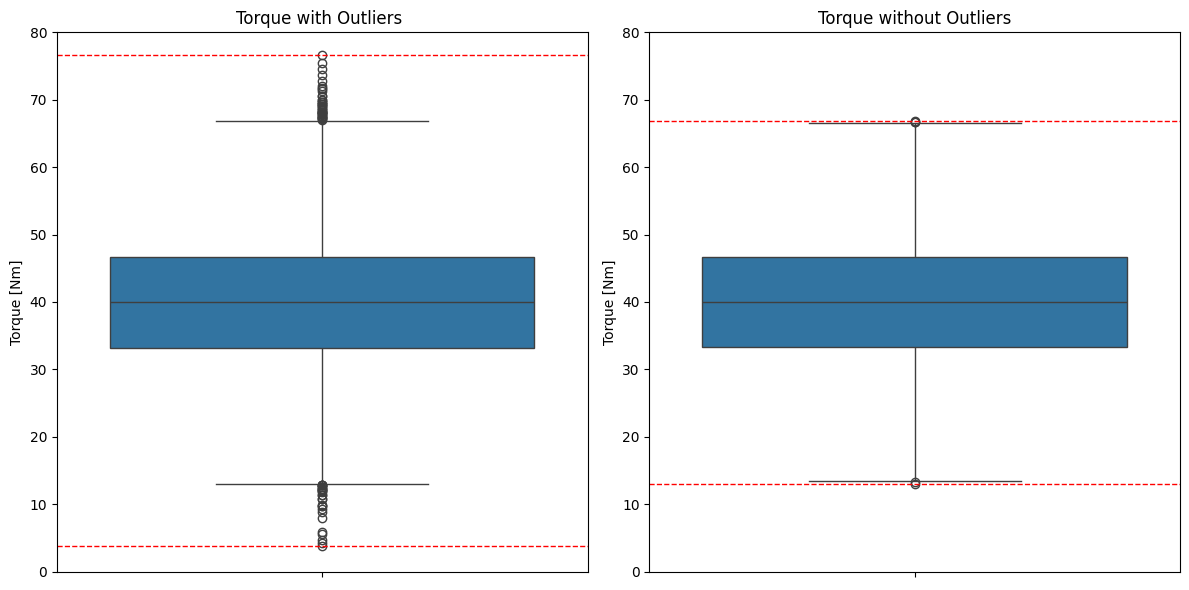

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with a specified figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (0, 80)

# First plot
sns.boxplot(data=failure_data_cleaned_v4, y='Torque [Nm]', ax=axes[0])
axes[0].set_title('Torque with Outliers ')
axes[0].set_ylim(y_limits)

# Calculate min and max for the first dataset
min_v4 = failure_data_cleaned_v4['Torque [Nm]'].min()
max_v4 = failure_data_cleaned_v4['Torque [Nm]'].max()

# Add horizontal dotted red lines for min and max
axes[0].axhline(y=min_v4, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=max_v4, color='r', linestyle='--', linewidth=1)

# Second plot
sns.boxplot(data=failure_data_cleaned_v5, y='Torque [Nm]', ax=axes[1])
axes[1].set_title('Torque without Outliers')
axes[1].set_ylim(y_limits)

# Calculate min and max for the second dataset
min_v5 = failure_data_cleaned_v5['Torque [Nm]'].min()
max_v5 = failure_data_cleaned_v5['Torque [Nm]'].max()

# Add horizontal dotted red lines for min and max
axes[1].axhline(y=min_v5, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=max_v5, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
# Null value checks 

info = DataFrameInfo(failure_data_cleaned_v5)
info.percentage_of_null()

# After Treating for skew & outliers there are no null values 

UDI                        0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
H                          0.0
L                          0.0
M                          0.0
z_score_torque             0.0
dtype: float64

In [96]:
# # TODO: create a method in the class for removing outliers from the variable 

# # create a method that identifies outliers in the DataInformation Class
#     # based on z score 
#         # adaptable threshold 
#     # based on quartile ranges 
# # create a method that removes outliers from the original data frame in the DataTransformation Class

# dt = DataTransform(failure_data_cleaned_v2)
# test_z = dt.z_score('Torque [Nm]')
# test_z = test_z.dropna() # add as feature in func 
# # ax = sns.boxplot(test_z)
# # ax.set_ylabel('Torque (Nm) Z - Scores')

# info = DataFrameInfo(failure_data_cleaned_v2)
# info.z_score_info(test_z)
# # info.z_score_info(test_z)

# # Info method, get_outliers 
# get_outliers(method = ['IQR', 'Z_score'], z_score_threshold = 2) # recomend 2 or 3])


# # def get_outliers_via_IQR()

    

In [ ]:
# class DataTransform:
#     def __init__(self, df):
#         self.df = df 

# class DataFrameInfo:
#     def __init__(self, df):
#         self.df = df 

# class Plotter:
#     def __init__(self, df):
#         self.df = df 


In [95]:
# create a function to get outliers via IQR 

def get_outliers_via_IQR(df, column):
    '''
    returns a DataFrame of outliers based on the IQR of the input column (variable) as well as statistical information about the output DataFrame.
    '''
    
    # Upper and lower quartiles 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(.75)

    # IQR
    IQR = Q3 - Q1 

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q1 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")

    var = failure_data_cleaned_v4['Torque [Nm]']

    # Identify outliers 
    var = failure_data_cleaned_v4[(torque < (Q1 - 1.5 * IQR)) | (torque > (Q3 + 1.5 * IQR))]

    print(f'Number of Outliers: {len(var)}')
    print("\n")
    # print('Outliers:')
    # print(var[column])
    return var 

# testing
test = get_outliers_via_IQR(df = failure_data_cleaned_v4, column = 'Torque [Nm]')
# type(test)
test

Q1 (25th percentile): 33.2
Q1 (75th percentile): 46.7
IQR: 13.5
Number of Outliers: 66




,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
97,6179,L,0.197578,310.9,0.31341,67.9,10.0,1,0,0,1,0,0,0,1,0,2.801076
374,4297,L,0.197578,310.2,0.31341,5.8,215.0,1,0,0,1,0,0,0,1,0,-3.427006
404,7764,L,0.197578,311.6,0.31341,76.6,3.0,1,0,0,1,0,0,0,1,0,3.673609
433,1325,M,0.197578,310.1,0.31341,74.5,194.0,1,0,0,1,1,0,0,0,1,3.462998
448,5335,M,0.197578,312.6,0.31341,9.8,65.0,1,0,0,1,0,0,0,0,1,-3.025841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,8004,M,0.197578,312.0,0.31341,67.3,159.0,0,0,0,0,0,0,0,0,1,2.740901
9063,7998,M,0.197578,312.2,0.31341,9.7,143.0,1,0,0,1,0,0,0,0,1,-3.035870
9233,8399,L,0.197578,309.7,0.31341,12.1,102.0,1,0,0,1,0,0,0,1,0,-2.795172
9328,3580,L,0.197578,310.6,0.31341,11.8,124.0,1,0,0,1,0,0,0,1,0,-2.825259


In [97]:
# scratch 

#filter out the outliers of Process Temperature from our main data set
outliers_2

#failure_data_cleaned_unskewed['UDI'].head()

mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

mask.sum()
failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]

In [98]:
# define a function to get z_scores 
# manish 

# def get_outliers_via_z_score_df(df, column, key = 'UDI', z_threshold = [[2,3]]):
    
def get_outliers_via_z_score_df(df, column, key, z_threshold):
    # ''''''
    
    # create z-scores 
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # Outliers Boolean
    outliers = np.abs(z_scores) > z_threshold
    print(outliers)
    # print(f"Debugging key variable: {key}")
    # print('df:')
    # print(df.head())
    # test = df[key].head()
    # print(test)

    # filter dataset based on outliers 
    mask = ~df[key].isin(outliers[key])
    outliers_via_z = df[mask]

    print('Outliers df:')
    print(outliers_via_z) 

    # info on output data
    percentage_outliers_thereshold = round(outliers/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {len(outliers)}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold}")

get_outliers_via_z_score_df(df=failure_data_cleaned_unskewed, key='UDI', column='Torque [Nm]', z_threshold = 2)




# might be better to create seperate functions 


0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Torque [Nm], Length: 9516, dtype: bool


KeyError: 'UDI'

In [99]:
# define a function to get z_scores 
# manish 

# def get_outliers_via_z_score_df(df, column, key = 'UDI', z_threshold = [[2,3]]):
    
def get_outliers_via_z_score_df(df, column, key, z_threshold):

    
    # create z-scores 
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # Outliers Boolean
    outliers = np.abs(z_scores) > z_threshold
    print(outliers)
    # print(f"Debugging key variable: {key}")
    # print('df:')
    # print(df.head())
    # test = df[key].head()
    # print(test)

    # filter dataset based on outliers 
    mask = ~df[key].isin(outliers[key])
    outliers_via_z = df[mask]

    print('Outliers df:')
    print(outliers_via_z) 

    # info on output data
    percentage_outliers_thereshold = round(outliers/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {len(outliers)}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold}")

get_outliers_via_z_score_df(df=failure_data_cleaned_unskewed, key='UDI', column='Torque [Nm]', z_threshold = 2)




# might be better to create seperate functions 


0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Torque [Nm], Length: 9516, dtype: bool


KeyError: 'UDI'

In [100]:
# running the bare code 

# inputs 
df = failure_data_cleaned_v4
column = 'Torque [Nm]'
z_threshold = 3
# key = 'UDI'

# create z-scores 
x = df[column] 
mean= np.mean(x)
standard_deviation = np.std(x)
z_scores = (x - mean) / standard_deviation

# working up to here 
# sns.boxplot(z_scores)

# calculate outliers 
outliers = np.abs(z_scores) > z_threshold
outliers.value_counts() # 24 outliers 

# outliers df
outliers_via_z = df[outliers]
outliers_via_z
####################################################################################################

def outliers_via_z_score_df(df, column, z_threshold = [[2,3]]):

    # create z scores
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # calculate outliers 
    outliers = np.abs(z_scores) > z_threshold
    outliers.value_counts() # 24 outliers 

    # outliers df
    outliers_via_z = df[outliers]
    return outliers_via_z


####################################################################################################
# # seperate function for taking out outliers 
mask = ~failure_data_cleaned_v4['UDI'].isin(outliers_via_z['UDI']) # if the UDI's in the outliers df match those in the original df, bring back FALSE
mask
failure_data_cleaned_v4[mask]

print(len(failure_data_cleaned_v4))
print(len(failure_data_cleaned_v4[mask]))

####################################################################################################

def filter_outliers(df, outliers_df, key_ID):
    mask = ~df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
    mask
    return df[mask]

    print(f'length of {df}: {len(df)}')
    print(f'length of filtered {df}: {len(df[mask])}')


# mask = outliers_via_z['UDI'].isin(outliers_udis) 
# failure_data_cleaned_v4 = failure_data_cleaned_v3[mask]
# filter out from original df 



8663
8639


In [101]:
# testing 
def outliers_via_z_score_df(df, column, z_threshold = [[2,3]]):

    # create z scores
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # calculate outliers 
    outliers = np.abs(z_scores) > z_threshold
    outliers.value_counts() # 24 outliers 

    # outliers df
    outliers_via_z = df[outliers]
    return outliers_via_z

test_outliers = outliers_via_z_score_df(df=failure_data_cleaned_v4, column='Torque [Nm]', z_threshold=3)
test_outliers
# success 

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
374,4297,L,0.197578,310.2,0.31341,5.8,215.0,1,0,0,1,0,0,0,1,0,-3.427006
404,7764,L,0.197578,311.6,0.31341,76.6,3.0,1,0,0,1,0,0,0,1,0,3.673609
433,1325,M,0.197578,310.1,0.31341,74.5,194.0,1,0,0,1,1,0,0,0,1,3.462998
448,5335,M,0.197578,312.6,0.31341,9.8,65.0,1,0,0,1,0,0,0,0,1,-3.025841
694,7570,L,0.197578,311.0,0.31341,71.8,149.0,1,0,0,1,0,0,0,1,0,3.192211
889,604,L,0.197578,309.8,0.31341,71.6,31.0,1,0,0,1,0,0,0,1,0,3.172153
1517,1785,L,0.197578,308.0,0.31341,3.8,57.0,1,0,0,1,0,0,0,1,0,-3.627588
3342,51,L,0.197578,309.1,0.31341,4.6,143.0,1,0,0,1,0,0,0,1,0,-3.547355
3357,6613,L,0.197578,310.6,0.31341,70.0,62.0,0,0,0,0,0,0,0,1,0,3.011687
3610,848,L,0.197578,307.4,0.31341,5.6,213.0,1,0,0,1,0,0,0,1,0,-3.447064


In [102]:
# testing 

def filter_outliers(df, outliers_df, key_ID):
    mask = ~df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
    mask
    print(f'length of original df: {len(df)}')
    print(f'length of filtered df: {len(df[mask])}')
    return df[mask]

test_df = filter_outliers(df=failure_data_cleaned_v4, outliers_df=test_outliers, key_ID = 'UDI')

test_df
# len(test_df)

# success


length of original df: 8663
length of filtered df: 8639


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
0,3416,L,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0,-0.307951
1,7130,L,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0,-0.899668
2,2320,M,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1,-0.648940
3,9601,M,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1,0.534495
4,614,L,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0,-0.999960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,3538,M,0.197578,311.0,0.31341,21.5,20.0,0,0,0,0,0,0,0,0,1,-1.852435
9512,9852,M,0.197578,309.3,0.31341,27.2,49.0,0,0,0,0,0,0,0,0,1,-1.280775
9513,9015,M,0.197578,308.1,0.31341,61.3,207.0,1,0,0,0,1,0,0,0,1,2.139154
9514,5895,L,0.197578,310.9,0.31341,37.9,164.0,0,0,0,0,0,0,0,1,0,-0.207659


In [103]:
# add the new functions to the DataTransform class

class DataTransform:
    def __init__(self, df):
        self.df = df 
        
    def outliers_via_z_score_df(self, column, z_threshold = [[2,3]]):

        # create z scores
        x = self.df[column] 
        mean= np.mean(x)
        standard_deviation = np.std(x)
        z_scores = (x - mean) / standard_deviation

        # calculate outliers 
        outliers = np.abs(z_scores) > z_threshold
        outliers.value_counts() # 24 outliers 

        # outliers df
        outliers_via_z = self.df[outliers]
        return outliers_via_z

    def filter_outliers(self, outliers_df, key_ID):
        mask = ~self.df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
        mask
        print(f'length of original df: {len(self.df)}')
        print(f'length of filtered df: {len(self.df[mask])}')
        return self.df[mask]

# testing 

dt = DataTransform(failure_data_cleaned_v4)
torque_z_df = dt.outliers_via_z_score_df(column='Torque [Nm]', z_threshold=3)
# success 

dt.filter_outliers(outliers_df=torque_z_df, key_ID='UDI')
# success 

# manish




length of original df: 8663
length of filtered df: 8639


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
0,3416,L,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0,-0.307951
1,7130,L,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0,-0.899668
2,2320,M,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1,-0.648940
3,9601,M,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1,0.534495
4,614,L,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0,-0.999960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,3538,M,0.197578,311.0,0.31341,21.5,20.0,0,0,0,0,0,0,0,0,1,-1.852435
9512,9852,M,0.197578,309.3,0.31341,27.2,49.0,0,0,0,0,0,0,0,0,1,-1.280775
9513,9015,M,0.197578,308.1,0.31341,61.3,207.0,1,0,0,0,1,0,0,0,1,2.139154
9514,5895,L,0.197578,310.9,0.31341,37.9,164.0,0,0,0,0,0,0,0,1,0,-0.207659


# Dropping overly correlated columns 

In [104]:
# Example using the dependant variable and `Air Temperature `

# Calculate the point-biserial correlation and p-value
r_pb, p_value = pointbiserialr(failure_data_without_null['Machine failure'], failure_data_without_null['Air temperature [K]'])

# Print the results with an explainable statement
print(f"The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is {round(r_pb, 3)} with a p-value of {round(p_value, 4)}.")
print("The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).")

# Interpretation of the p-value
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation.")

# Interpretation of the r_pb value
if r_pb > 0:
    direction = "positive"
else:
    direction = "negative"

strength = ""
abs_r_pb = abs(r_pb)
if abs_r_pb < 0.1:
    strength = "negligible"
elif abs_r_pb < 0.3:
    strength = "weak"
elif abs_r_pb < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"The correlation is {direction} and the strength of the correlation is {strength}.")


The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is 0.077 with a p-value of 0.0.
The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.
The correlation is positive and the strength of the correlation is negligible.


- In the context of time we will continue without this and give more attention to the collinearity section

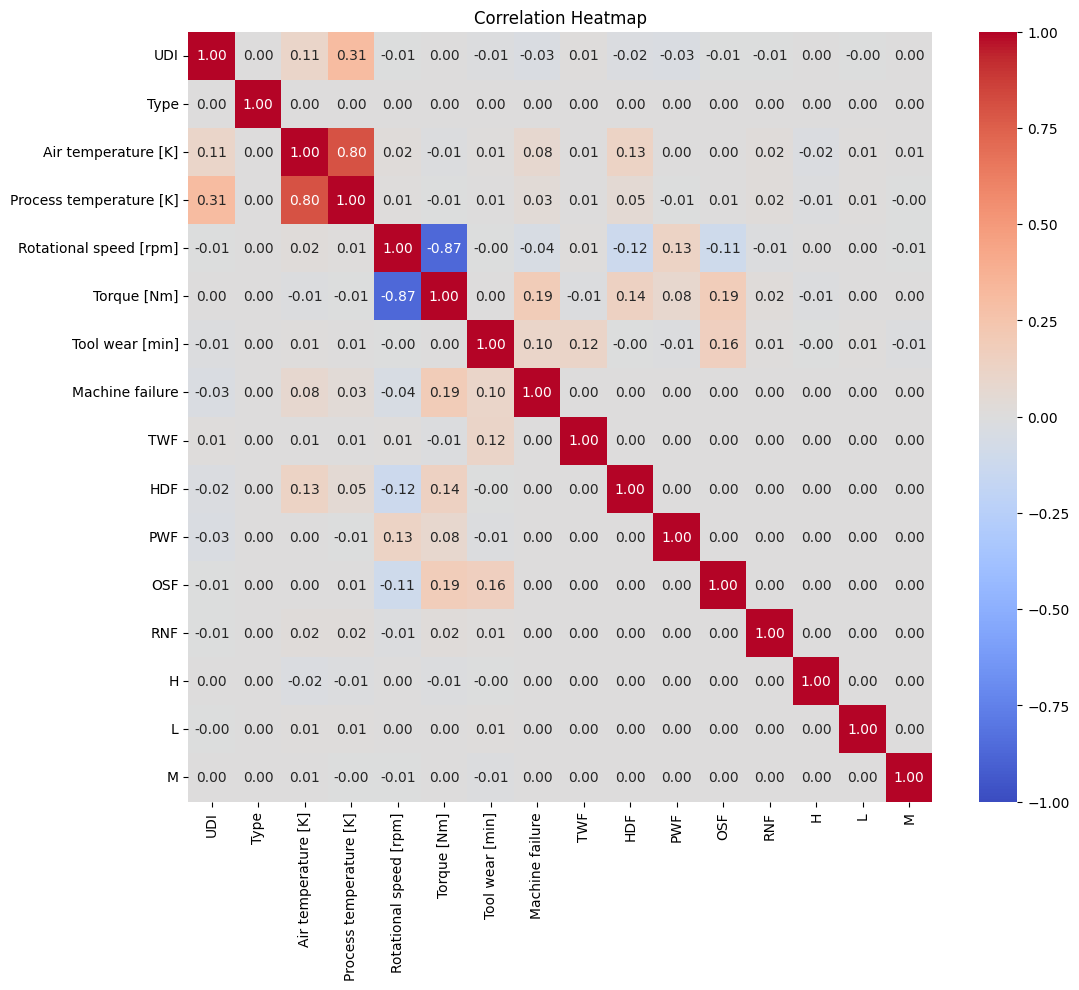

In [105]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Identify binary and continuous variables
binary_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].nunique() == 2]
continuous_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].dtype in ['int64', 'float64'] and failure_data_without_null[col].nunique() > 2]

# Initialize the correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(failure_data_without_null.columns), len(failure_data_without_null.columns))), index=failure_data_without_null.columns, columns=failure_data_without_null.columns)

# Compute correlations
for var1 in failure_data_without_null.columns:
    for var2 in failure_data_without_null.columns:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  # Correlation with itself is 1
        elif var1 in binary_vars and var2 in continuous_vars:
            r_pb, _ = pointbiserialr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pb
            corr_matrix.loc[var2, var1] = r_pb
        elif var1 in continuous_vars and var2 in continuous_vars:
            r_pearson, _ = pearsonr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pearson
            corr_matrix.loc[var2, var1] = r_pearson

# Plot the heatmap with annotations rounded to 2 decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


The above Heat map is using the failure_data before any statistical transformation, only NULL values have been taken out.
Addionally the correlation caluclation uses Pearson for continous vs continous variables & PointBiserial for binary vs continous variables 

Analysis:
- Air temperature & Process temperature have a strong positive correlation 
- Rotational speed & Torque have a strong negative correlation

Proceed to look at the data after transformation: failure_data_cleaned_v6

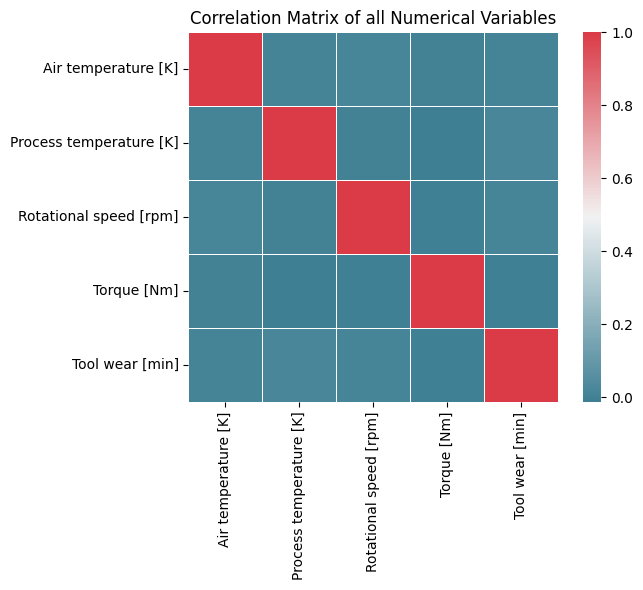

In [109]:
# look at only continous variables 
# failure_data_cleaned_v6.drop('z_score_torque', inplace=True, axis =1)
# Correlation 
corr = failure_data_cleaned_v5[continous_variables].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, square=True, linewidths=.5, annot=False, cmap=cmap)

plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

- no indications of collinearity 
- binary vars have been dropped here 

In [113]:
# only numeric variables for correlation map
# # drop string variables 
failure_data_cleaned_v6 = failure_data_cleaned_v5.drop('Type', axis = 1)

failure_data_cleaned_v6.columns 

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'z_score_torque'],
      dtype='object')

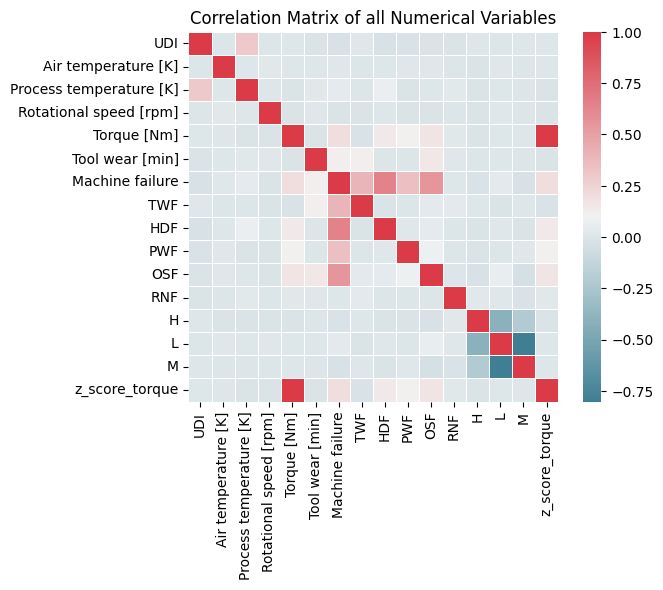

In [114]:
# Do a correlation map of the continous variables 

# continous_variables = ['Machine failure', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# corr = failure_data_cleaned_v6[continous_variables].corr()


corr_post_transformations = failure_data_cleaned_v6.corr()

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# cover upper triangle 

# Draw the heatmap
sns.heatmap(corr_post_transformations, square=True, linewidths=.5, annot=False, cmap=cmap)

plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

# sns.heatmap(corr)

- The dependant variable `Machine failure` is binary, therefore the above Pearsons's correlation approach is only appropriate for two continous variables. 
- Use Point-biserial correlation coefficient (PBC) instead. This is specifically designed for the case where the dependant variable is binary.

<Axes: >

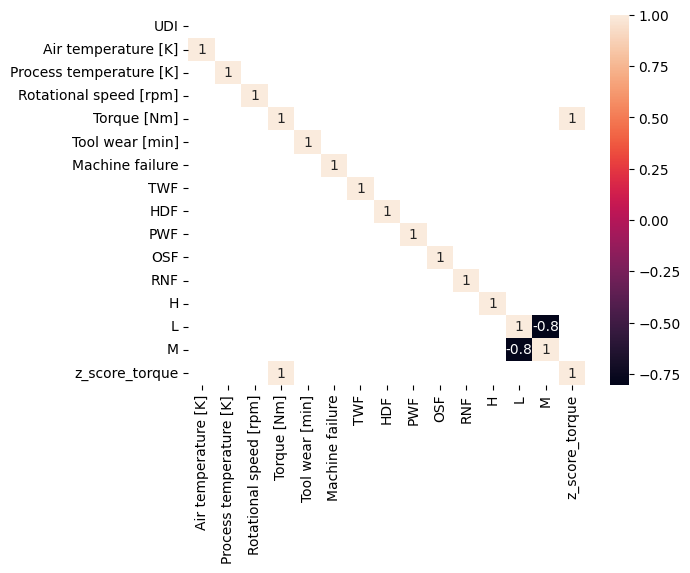

In [173]:
corr_post_transformations_v2 = corr_post_transformations.drop('UDI', axis = 1)
corr_post_transformations_v2

mask = np.abs(corr_post_transformations_v2) > 0.7
mask = corr_post_transformations[mask].notnull()
endo = corr_post_transformations_v2[mask]
sns.heatmap(endo, annot=True)

- possible collinearity between 'L' & 'M'

#### testing for Collinerity 

In [715]:
continous_variables

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [116]:
# come back to the correlation map

# continue with collinearity.
# 

failure_data_cleaned_v7 = failure_data_cleaned_v6.drop('UDI', axis=1 ) 
failure_data_cleaned_v7.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'z_score_torque'],
      dtype='object')

In [775]:
# import statsmodels.formula.api as smf
# model0 = smf.ols("Machine failure ~ `Air temperature [K]`", data=failure_data_cleaned_v7).fit()
# model0.summary()


In [117]:
# Possible collinearity between 'L' & 'M'

import statsmodels.api as sm
# import statsmodels.formula.api as smf

## Fit a linear regression


Y = failure_data_cleaned_v7['Machine failure']
# X = failure_data_cleaned_v7[['L', 'M']]

X = failure_data_cleaned_v7[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M']]

model = sm.OLS(Y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Machine failure   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:00:40   Log-Likelihood:                 14909.
No. Observations:                8597   AIC:                        -2.979e+04
Df Residuals:                    8585   BIC:                        -2.971e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Air temperature [K]      1.001e+07   1.16e+07      0.862      0.389   -1.27e+07    3.28e+07
Process temperature [K]   4.36e-05      0.000      0.120      0.905      -0.001       0.001
Rotational speed [rpm]  -6.017e+07   6.98e+07     -0.862      0.389   -1.97e+08    7.67e+07
Torque [Nm]              9.032e-05   4.92e-05      1.836      0.066   -6.09e-06       0.000
Tool wear [min]          2.191e-06   7.37e-06      0.297      0.766   -1.23e-05    1.66e-05
TWF                         0.9542      0.007    139.772      0.000       0.941       0.968
HDF                         0.9543      0.004    221.180      0.000       0.946       0.963
PWF                         0.8426      0.008    105.072      0.000       0.827       0.858
OSF                         0.8766      0.005    172.762      0.000       0.867       0.887
RNF                     -5.429e-06      0.010     -0.001      1.000      -0.019       0.019
H                        1.688e+07   1.96e+07      0.862      0.389   -2.15e+07    5.53e+07
L                        1.688e+07   1.96e+07      0.862      0.389   -2.15e+07    5.53e+07
M                        1.688e+07   1.96e+07      0.862      0.389   -2.15e+07    5.53e+07
==============================================================================
Omnibus:                     7364.361   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55839958.537
Skew:                           2.461   Prob(JB):                         0.00
Kurtosis:                     397.794   Cond. No.                     4.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.1e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
# Variables with high p-values
# get the summary table as a df 
summary_df = model.summary2().tables[1]
summary_df

variables_with_high_p_value = summary_df[summary_df['P>|t|'] > 0.05]

print(variables_with_high_p_value['P>|t|'])


# continue with VIFF 

Air temperature [K]        0.388665
Process temperature [K]    0.904639
Rotational speed [rpm]     0.388665
Torque [Nm]                0.066320
Tool wear [min]            0.766158
RNF                        0.999559
H                          0.388665
L                          0.388665
M                          0.388665
Name: P>|t|, dtype: float64


In [800]:
# import statsmodels.formula.api as smf
# model1 = smf.ols("`Machine failure` ~ L + M", failure_data_cleaned_v7).fit()
# model.summary()

In [119]:
import statsmodels.formula.api as smf

# Rename the column
failure_data_cleaned_v7 = failure_data_cleaned_v7.rename(columns={'Machine failure': 'Machine_failure'})

# Fit the model with the renamed column
model1 = smf.ols("Machine_failure ~ L + M", data=failure_data_cleaned_v7).fit()

# Display the summary of the model
print(model1.summary())

# Optionally, rename the column back to its original name
# failure_data_cleaned_v7 = failure_data_cleaned_v7.rename(columns={'Machine_failure': 'Machine failure'})

                            OLS Regression Results                            
Dep. Variable:        Machine_failure   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.393
Date:                Fri, 02 Aug 2024   Prob (F-statistic):            0.00457
Time:                        15:00:56   Log-Likelihood:                 3258.9
No. Observations:                8597   AIC:                            -6512.
Df Residuals:                    8594   BIC:                            -6491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0188      0.006      3.307      0.0

### start again and use the smf package 

In [120]:
failure_data_cleaned_v7.columns
failure_data_cleaned_v7.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M,z_score_torque
0,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0,-0.307951
1,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0,-0.899668
2,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1,-0.648940
3,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1,0.534495
4,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0,-0.999960


In [127]:
# rename all columns 

failure_data_cleaned_v7 = failure_data_cleaned_v7.rename(columns={
    'Machine_failure': 'machine_failure',
    'Air temperature [K]': 'air_temp_normalised', 
    'Process temperature [K]':'process_temp',
    'Rotational speed [rpm]':'rotational_speed_normalised',
    'Torque [Nm]': 'torque', 
    'Tool wear [min]': 'tool_wear'
    
    })
failure_data_cleaned_v7.columns
# create a regression model using all explanatory variables 

failure_data_cleaned_v7.drop('z_score_torque', axis=1, inplace=True)


In [128]:
import statsmodels.formula.api as smf

# Fit the model with the renamed column
model0 = smf.ols("machine_failure ~ air_temp_normalised + process_temp + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF +RNF + L + M + H", data=failure_data_cleaned_v7).fit()

# Display the summary of the model
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        machine_failure   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:02:59   Log-Likelihood:                 14909.
No. Observations:                8597   AIC:                        -2.979e+04
Df Residuals:                    8585   BIC:                        -2.971e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [123]:
# Get summary table as a df 
summary_df = model0.summary2().tables[1]

# Filter variables with p-value > 0.05
variables_with_high_p_value = summary_df[summary_df['P>|t|'] > 0.05]

print(variables_with_high_p_value['P>|t|'])

Intercept                      0.388658
air_temp_normalised            0.388658
process_temp                   0.904773
rotational_speed_normalised    0.388658
torque                         0.066300
tool_wear                      0.766720
RNF                            0.999559
L                              0.388658
M                              0.388658
H                              0.388658
Name: P>|t|, dtype: float64


In [124]:
# create models for each variable with a high p - value 

exog_air_temp_normalised = smf.ols("air_temp_normalised ~ machine_failure + process_temp + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF +RNF + L + M + H", failure_data_cleaned_v7).fit()
exog_process_temp = smf.ols("process_temp ~ machine_failure + air_temp_normalised + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF +RNF + L + M + H", failure_data_cleaned_v7).fit()
exog_rotational_speed_normalised = smf.ols("rotational_speed_normalised ~ machine_failure + process_temp + air_temp_normalised + torque + tool_wear + TWF + HDF + PWF + OSF +RNF + L + M + H", failure_data_cleaned_v7).fit()
exog_torque = smf.ols("torque ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + tool_wear + TWF + HDF + PWF + OSF +RNF + L + M + H", failure_data_cleaned_v7).fit()
exog_tool_wear = smf.ols("tool_wear ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + torque + TWF + HDF + PWF + OSF +RNF + L + M + H", failure_data_cleaned_v7).fit()
exog_RNF = smf.ols("RNF  ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + torque + TWF + HDF + PWF + OSF + tool_wear + L + M + H", failure_data_cleaned_v7).fit()
exog_L = smf.ols("L  ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + torque + TWF + HDF + PWF + OSF + tool_wear + RNF + M + H", failure_data_cleaned_v7).fit()
exog_M = smf.ols("M  ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + torque + TWF + HDF + PWF + OSF + tool_wear + RNF + L + H", failure_data_cleaned_v7).fit()
exog_H = smf.ols("H  ~ machine_failure + process_temp + air_temp_normalised + rotational_speed_normalised + torque + TWF + HDF + PWF + OSF + tool_wear + RNF + M + L", failure_data_cleaned_v7).fit()

all_r_squared =[exog_air_temp_normalised.rsquared, 
                exog_process_temp.rsquared, 
                exog_rotational_speed_normalised.rsquared, 
                exog_torque.rsquared, 
                exog_tool_wear.rsquared, 
                exog_RNF.rsquared, 
                exog_L.rsquared, 
                exog_M.rsquared, 
                exog_H.rsquared
                ]

all_exog_var_names = ['air_temp_normalised', 
                'process_temp', 
                'rotational_speed_normalised', 
                'torque', 
                'tool_wear', 
                'RNF', 
                'L', 
                'M', 
                'H'
                ]

exog_info = pd.DataFrame({
    'Variable': all_exog_var_names,
    'R_squared': all_r_squared
})
exog_info


,Variable,R_squared
0,air_temp_normalised,-1.571336e+14
1,process_temp,6.068706e-03
2,rotational_speed_normalised,7.091642e-04
3,torque,5.864292e-02
4,tool_wear,3.615676e-02
5,RNF,2.991021e-03
6,L,1.000000e+00
7,M,1.000000e+00
8,H,1.000000e+00


In [125]:
def VIF(r2):
    return 1/(1-r2)

exog_info['VIF'] = exog_info['R_squared'].apply(VIF)
exog_info

,Variable,R_squared,VIF
0,air_temp_normalised,-1.571336e+14,6.364012e-15
1,process_temp,6.068706e-03,1.006106e+00
2,rotational_speed_normalised,7.091642e-04,1.000710e+00
3,torque,5.864292e-02,1.062296e+00
4,tool_wear,3.615676e-02,1.037513e+00
5,RNF,2.991021e-03,1.003000e+00
6,L,1.000000e+00,2.842195e+11
7,M,1.000000e+00,1.431987e+13
8,H,1.000000e+00,4.503600e+14


In [130]:
failure_data_cleaned_v7.head()

,air_temp_normalised,process_temp,rotational_speed_normalised,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0
1,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0
2,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1
3,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1
4,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0


In [828]:
# filter for VIFS greater than 10 

exog_info[exog_info['VIF'] > 10]

,Variable,R_squared,VIF
6,L,1.0,2.842195e+11
7,M,1.0,1.431987e+13
8,H,1.0,4.503600e+14


Some thought after discussing with Jared:
- encode the categorical columns and plot the correlation matrix 
- Chi-squared 

in our dataset we have the following types of data:
- continous data 
- binary categorical data 

when looking at correlation do the following
- Continous vs Continous: Pearson correlation
- Binary vs Binary: Pearson correlation 
    - This becomes the `Phi coefficient` calculated via the Pearson correlation calculation 
    - Chi squared test: if there is significant association between two categoric variables
- Continous vs Binary: Point Biserial correlation test 

Next steps:
- chi-squared test of the binary vs binary varibles 
- log model & vifs

In [ ]:
# khurmi
# do the chi squared test instead
# use logistic regression instead of OLS 




In [131]:
# VIF 

def VIF(r2):
    return 1/(1-r2)

# VIF scored for each model 

vif_air = VIF(exog_air_temp_normalised.rsquared)
vif_process_temp = VIF(exog_process_temp.rsquared)
vif_rotation = VIF(exog_rotational_speed_normalised.rsquared)
vif_torque = VIF(exog_torque.rsquared) 
vif_tool_wear = VIF(exog_tool_wear.rsquared) 
vif_RNF = VIF(exog_RNF.rsquared) 
vif_L = VIF(exog_L.rsquared) 
vif_M = VIF(exog_M.rsquared)
vif_H = VIF(exog_H.rsquared)

all_exog_VIFs = []
vif_process_temp 
vif_rotation 
vif_torque 
vif_tool_wear 
vif_RNF 
vif_L 
vif_M 
vif_H 

SyntaxError: invalid syntax (3204885418.py, line 18)

### Strategy:
- encode the categorical cols and plot the correlation matrix.
- test categorical vs categorical cols for collinearity using chi-squared test. The P-value will determine whether there is a relationship and the chi squared value will determine the degree of collinearity.
- Logistic model for Binar vs Continous variables

<Axes: >

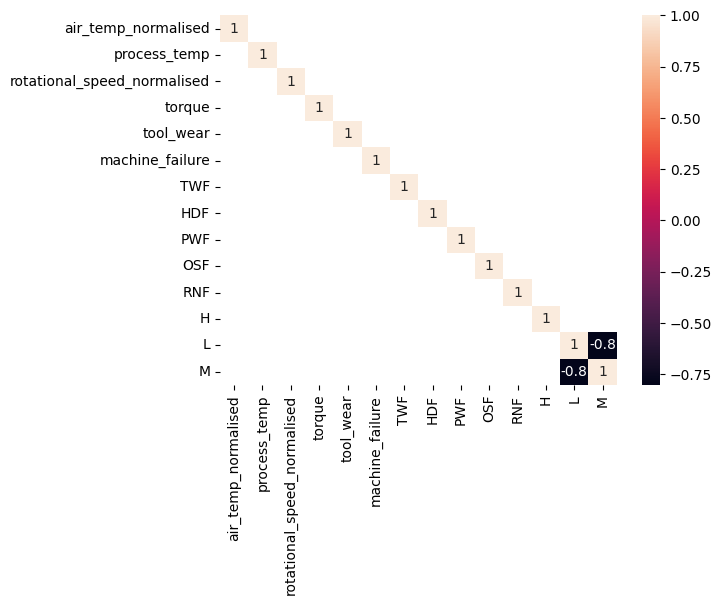

In [148]:
# Correlation Heatmap filtered for only those variables with high correlation 

corr = failure_data_cleaned_v7.corr()
mask = np.abs(corr) > 0.7 
corr[mask]
sns.heatmap(corr[mask], annot=True)

- L & M are highly correlated.
- Proceed with Chi-Squared tests between categoric variables

In [151]:
# List of our categoric variables
failure_data_cleaned_v7.columns
categoric_variables_col_names = ['machine_failure','TWF', 'HDF', 'PWF', 'OSF','RNF', 'H', 'L', 'M' ]
categoric_variables_col_names

# Filter for only categoric varibles 
categoric_vars = failure_data_cleaned_v7[categoric_variables_col_names]
categoric_vars

,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9511,0,0,0,0,0,0,0,0,1
9512,0,0,0,0,0,0,0,0,1
9513,1,0,0,0,1,0,0,0,1
9514,0,0,0,0,0,0,0,1,0


In [ ]:
# chi squared tests for categoric vs categoric vars

# create contingency tables
# perform chi-squared tests
# interpret results 

In [158]:
# list of independant binary categorical variables 
from scipy.stats import chi2_contingency 

independant_vars = categoric_vars.drop('machine_failure', axis=1).columns
independant_vars

# perfrom chi-squared tests 
results = {}

for var in independant_vars:
    contingency_table = pd.crosstab(categoric_vars['machine_failure'], categoric_vars[var])
    chi2, p, _, _  = chi2_contingency(contingency_table)
    results[var] = {'chi2': chi2, 'p-value':p}

# display the results 
results_df = pd.DataFrame(results).T
round(results_df, 2)

,chi2,p-value
TWF,1346.26,0.00
HDF,3513.01,0.00
PWF,965.17,0.00
OSF,2600.50,0.00
RNF,0.00,1.00
H,2.74,0.10
L,10.12,0.00
M,5.06,0.02


- `RNF` has a p-value of 1, suggesting strong evidence that this variable has no relationship with the dependant variable `machine_failure`. Consider dropping this varible.
- `RNF` represents randon failures. This varibale may have important information that is unseen in other variables. We will not drop this variable due it's relevence in the context of machine failures.
- `H` also has a p-value higher than 0.05 suggestion that it weakly supports the null hypothesis that `H` has no meaningful relationship with `machine_failure`. Not strong enough to completely reject `H`, on statistical evidence alone.
- All other categorical independent variables had p-values less that 0.05, rejecting the null hypothesis.


In [ ]:
### TODO: include the mathematical notation of the chi-squared test used, H0 & examples in the context of machine_failure.

In [159]:
failure_data_cleaned_v7.head(3)

,air_temp_normalised,process_temp,rotational_speed_normalised,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0
1,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0
2,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1


In [169]:
# check there are null values 
failure_data_cleaned_v7[['air_temp_normalised', 'process_temp', 'rotational_speed_normalised', 'torque', 'tool_wear', 'machine_failure']].isnull().sum()

air_temp_normalised            0
process_temp                   0
rotational_speed_normalised    0
torque                         0
tool_wear                      0
machine_failure                0
dtype: int64

In [163]:
# procced with logistic model, to look at correlation in binary vs continous vars
# Fit a logistic model 

import statsmodels.api as sm 

# Define independant vars and add constant
X = failure_data_cleaned_v7[['air_temp_normalised', 'process_temp', 'rotational_speed_normalised', 'torque', 'tool_wear']]
X = sm.add_constant(X)

# Define the dependant variable
y = failure_data_cleaned_v7['machine_failure']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())


         Current function value: 0.097230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        machine_failure   No. Observations:                 8597
Model:                          Logit   Df Residuals:                     8591
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.2443
Time:                        19:08:41   Log-Likelihood:                -835.89
converged:                      False   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                1.501e-114
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -69.5796        nan        nan        nan         nan         nan
air_temp_norma

/Users/manishkhurmi/anaconda3/envs/datascience_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [171]:
# Try again, dropping normalised values 

# procced with logistic model, to look at correlation in binary vs continous vars
# Fit a logistic model 

import statsmodels.api as sm 

# Define independant vars and add constant
X = failure_data_cleaned_v7[['process_temp', 'torque', 'tool_wear']]
X = sm.add_constant(X)

# Define the dependant variable
y = failure_data_cleaned_v7['machine_failure']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.097230
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        machine_failure   No. Observations:                 8597
Model:                          Logit   Df Residuals:                     8593
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.2443
Time:                        19:14:12   Log-Likelihood:                -835.89
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                8.301e-117
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -79.1296     17.116     -4.623      0.000    -112.676     -45.583
process_temp     0.214

- P values of `process_temp`, `torque` and `tool_wear` are close to 0, rejecting the null hypothesis in support of the alternative hypothesis the data is statistically related to the dependant variable. Therefore changes in these variables are associated with changes with the liklihood of `machine_failure` occuring.

In [ ]:
# calculate VIFS of the continous variables 
    # create a log model for each of the independant vars vs other vars 
    # use the r2 from the models in the VIF calc

import statsmodels.api as sm 

# # Define independant vars and add constant
# X = failure_data_cleaned_v7[['process_temp', 'torque', 'tool_wear']]
# X = sm.add_constant(X)

# # Define the dependant variable
# y = failure_data_cleaned_v7['machine_failure']

# # Fit the logistic regression model
# model = sm.Logit(y, X).fit()
# print(model.summary())

# process_temp log model 
X = failure_data_cleaned_v7[['machine_failure', 'torque', 'tool_wear']]
X = sm.add_constant(X)
y = failure_data_cleaned_v7['process_temp']
log_model_process_temp = sm.Logit(y, X).fit()
print(log_model_process_temp.summary())

In [182]:
def log_model(df, X, y):
    # X = failure_data_cleaned_v7[['machine_failure', 'torque', 'tool_wear']]
    X = df[X]
    y = df[y]
    X = sm.add_constant(X)
    log_model = sm.Logit(y, X).fit()
    return log_model
    print(log_model.summary())

# log_model(df= failure_data_cleaned_v7, X = ['machine_failure', 'torque', 'tool_wear'], y = 'process_temp')
# requires the dependent variable to be binary (0,1)

ValueError: endog must be in the unit interval.

In [185]:
import statsmodels.formula.api as smf

# # Rename the column
# failure_data_cleaned_v7 = failure_data_cleaned_v7.rename(columns={'Machine failure': 'Machine_failure'})

# # Fit the model with the renamed column
# model1 = smf.ols("Machine_failure ~ L + M", data=failure_data_cleaned_v7).fit()

# # Display the summary of the model
# print(model1.summary())

def ols_model(df,y, X, formula): 
    # ols_model = smf.ols("Machine_failure ~ L + M", data=failure_data_cleaned_v7).fit()
    # contstruct the formula string 
    # formula = f"{y} ~ " + " + ".join(x)

    ols_model = smf.ols(formula, data=df).fit()
    return ols_model.summary()
    print(ols_model.summary())

# OLS model of continous vars 
ols_model(failure_data_cleaned_v7, y = 'process_temp', X = ['air_temp_normalised', 
                                                            'rotational_speed_normalised', 'torque', 'tool_wear']
                                                            formula= "process_temp ~ 'air_temp_normalised', 
                                                            'rotational_speed_normalised', 'torque', 'tool_wear')


TypeError: sequence item 0: expected str instance, float found

Dropping overly correlated columns (conclusion):
- No columns will be dropped 
- TODO: supportive points from chi-squared analysis etc. 
- TODO: calculate VIFS of continous vars by doing OLS reg, create a ols_model func 
    - e.g. process_temp = etc etc, get r2, calculate VIFs 

# Scratch work

In [657]:
# # too complicated and un neccessary 
# # inputs 
# df = failure_data_cleaned_v4
# column = 'Torque [Nm]'
# z_threshold = 3
# key = 'UDI'

# # create z-scores 
# x = df[column] 
# mean= np.mean(x)
# standard_deviation = np.std(x)
# z_scores = (x - mean) / standard_deviation

# df['z_scores'] = z_scores 

# test = df[['UDI', 'z_scores']].tail(20)
# test

# # Use .loc to avoid SettingWithCopyWarning
# test.loc[:, 'UDI_outliers'] = np.where(np.abs(test['z_scores']) > 3, test['UDI'], 0)

# # Display the updated DataFrame
# print(test)

# # df['UDI_outlier'] = np.abs(df['z_scores']) > 3 


# # if np.abs(df['z_scores']) > 3:
# #     df['UDI_outlier'].append(False)


# # def udi_outliers(row):
# #     if np.abs(row['z_scores']) > 3:
# #         val = row['UDI']
# #     else:
# #         val = False

# # test['UDI_outliers'] = test.apply(udi_outliers, axis=1)
# # test['UDI_outliers']
    

# # df[['UDI', 'z_scores', ['UDI_outliers']]]

# # working up to here 
# # sns.boxplot(z_scores)

# # # calculate outliers 
# # outliers = np.abs(z_scores) > z_threshold
# # outliers.value_counts() # 24 outliers 



# # # # outliers df
# # outliers_via_z = df[outliers]
# # outliers_via_z


       UDI  z_scores  UDI_outliers
9495  6403 -0.328009             0
9497  8644  1.437116             0
9498  7839  0.925631             0
9499  2400 -0.418271             0
9500  7631 -0.227718             0
9501   244  0.414146             0
9502  2826 -0.648940             0
9503   297  0.624757             0
9504  4040 -0.067252             0
9505   345 -2.624677             0
9506  2500  0.845398             0
9507  5760 -0.418271             0
9508  1527 -1.240658             0
9509  2975 -0.277863             0
9510  9057  0.193505             0
9511  3538 -1.852435             0
9512  9852 -1.280775             0
9513  9015  2.139154             0
9514  5895 -0.207659             0
9515  4385  0.273738             0


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_24976/3222282159.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_scores'] = z_scores


In [2]:
# creating a new column where it returns UDI if it is an outlier, else return false.

In [623]:
# vanders approach 
# define a function to get z_scores 


# def get_outliers_via_z_score_df(df, column, key = 'UDI', z_threshold = [[2,3]]):
    
def get_outliers_via_z_score_df(df, column, z_threshold):
    # ''''''
    
    # create z-scores 
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # Outliers Boolean
    outliers = np.abs(z_scores) > z_threshold
    # print(outliers)
    # print(f"Debugging key variable: {key}")
    # print('df:')
    # print(df.head())
    # test = df[key].head()
    # print(test)

    # filter dataset based on outliers 
    mask = df.isin(outliers)
    print(mask)
    outliers_via_z = df[mask]
    print(outliers_via_z)

    # print('Outliers df:')
    # print(len(outliers_via_z)) 

    # # info on output data
    # percentage_outliers_thereshold = round(outliers/len(z_scores) * 100, 2)

    # print(f"Number of observations with outliers based on z-score threshold ±2: {len(outliers)}")
    # print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold}")

get_outliers_via_z_score_df(df=failure_data_cleaned_unskewed, column='Torque [Nm]', z_threshold = 3)


# I've created this function so that the user is aware of what and how they will be

# might be better to create seperate functions 


        UDI  Product ID   Type  Air temperature [K]  Process temperature [K]  \
0     False       False  False                False                    False   
1     False       False  False                False                    False   
2     False       False  False                False                    False   
3     False       False  False                False                    False   
4     False       False  False                False                    False   
...     ...         ...    ...                  ...                      ...   
9995  False       False  False                False                    False   
9996  False       False  False                False                    False   
9997  False       False  False                False                    False   
9998  False       False  False                False                    False   
9999  False       False  False                False                    False   

      Rotational speed [rpm]  Torque [N

In [611]:
# split up the function 

# create z_scores based on input threshold 

failure_data_cleaned_unskewed.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'H', 'L', 'M'],
      dtype='object')

In [602]:
failure_data_cleaned_unskewed.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,3416,L50595,L,0.197578,310.4,0.31341,36.9,133.0,0,0,0,0,0,0,0,1,0
1,7130,L54309,L,0.197578,310.0,0.31341,31.0,107.0,0,0,0,0,0,0,0,1,0
2,2320,M17179,M,0.197578,308.8,0.31341,33.5,185.0,0,0,0,0,0,0,0,0,1
3,9601,M24460,M,0.197578,310.0,0.31341,45.3,58.0,0,0,0,0,0,0,0,0,1
4,614,L47793,L,0.197578,309.9,0.31341,30.0,53.0,0,0,0,0,0,0,0,1,0


In [ ]:
# Notes from function above
    # apply threshold 
    # filter 
    # output df 



    
    # def z_score_info(self, z_scores):
    #     # Z-score Threshold 
    #     threshold_2 = 2 
    #     threshold_3 = 3
    #     # z_scores = udi_process_temp_df_z['z_scores']

    #     outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
    #     outliers_3 = (np.abs(z_scores) > threshold_3).sum()

    #     percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
    #     percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

    #     print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
    #     print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
    #     print("\n")
    #     print(f"Number of observations with outliers based on z-score threshold ±3: {outliers_3}")
    #     print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

    # def z_score(self, column): # takes in a column and creates z scores, 
    #     x = self.df[column] 
    #     mean= np.mean(x)
    #     standard_deviation = np.std(x)
    #     z_scores = (x - mean) / standard_deviation
    #     return z_scores

# FIXTHIS 
# manish

In [593]:
failure_data_cleaned_unskewed['UDI']

0       3416
1       7130
2       2320
3       9601
4        614
        ... 
9995    9018
9996    3339
9997    5771
9998    3056
9999    6026
Name: UDI, Length: 9516, dtype: int64

In [ ]:
# create a function to get Z_scores 

In [197]:
# def continous_variables(df):
#     continous_variables = []
#     for i in df.columns:
#         if df[i].nunique() > 2:
#             continous_variables.append(i)
#     return continous_variables

In [198]:
# continous_variables(failure_data_without_null)

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [216]:

# variable_name = []
# variable_description = []


# for i in failure_data_without_null.columns:
#     variable_name.append(i)
#     if failure_data_without_null[i].nunique() > 2:
#         variable_description.append("continous data")
#     else:
#         variable_description.append('other data type')



# variable_info = pd.DataFrame({
#     'variable_name': variable_name,
#     'variable_description': variable_description
# })

# display(variable_info)

# Analysis & Visualisation ideas 

In [ ]:
# EDA ideas 

# check the balance of the data set for `machine failure` variable.
    # do this is with a bar chart 
# Do a correlation matrix of all numerical variables, where the dependant (y) variable is 'machine failure' 

# categorical plots 
# correcting the skew - do this first for the independant variables that have the highest correlation 
# count plots of our nominal category data (those with binary data)
# summary plots - pairplot 

In [6]:
failure_data_without_null['Machine failure'].value_counts()
# Data set is heavyly in balanced, this will cause a bias in ML 

Machine failure
0    9188
1     328
Name: count, dtype: int64

In [ ]:
# do this is with a bar chart 
# Do a correlation matrix of all numerical variables, where the dependant (y) variable is 'machine failure' 

# categorical plots 
# correcting the skew - do this first for the independant variables that have the highest correlation 
# count plots of our nominal category data (those with binary data)
# summary plots - pairplot 

# create a bar plot of purpose vs amount
sns.barplot(data=failure_data_after_transformations['Machine failure'])